# New York City 2015 Street Tree Census - EDA<br/>
#### Marcella Harris

### [Table of Contents](#table-of-contents)
**[Clean Up A Bit](#clean-up-a-bit)**<br>
 - **[Remaining NaNs](#clean-up-a-bit)**<br>
  
**[Data Wrangling](#data-wrangling)**<br>
 - **[Features Tree Diameter and Stump Diameter](#features-tree-diameter-and-stump-diameter)**<br>
 - **[Features Root_Stone... Brch_Other](#features-root_stone...-brch_other)**<br>
 - **[Feature: Tree Diameter - (Alive)](#feature:-tree-diameter---(alive))**<br>
 - **[Feature: Stump Diameter - (Stumps)](#feature:-stump-diameter---(stumps))**<br>
 - **[Feature: Created At](#feature:-created-at)**<br>
 - **[Features: Curb Location By Conditions](#features:-curb-location-by-conditions)**<br>
 - **[Feature: Species](#feature:-species)**<br>
 - **[Feature: Created At - (Months)](#feature:-created-at---(months))**<br>
 - **[Features: Curb Location By Species](#feature:-curb-location-by-species)**<br>
 - **[Feature: Steward](#feature:-steward)**<br>

# Libraries

In [1]:
# Import modules

import os
import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statistics
from numpy import percentile
from numpy import mean
from numpy import std

# Change pd column/rows options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Change plot settings
plt.style.use('ggplot')
sns.set(style = 'whitegrid')

# Dataset

In [2]:
#R Read file

treeCensusDF = pd.read_csv("../ny_street-trees_2015/2015_Street_Tree_Census_-_Tree_Data.csv")
treeCensusDF.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,None,No,No,No,No,No,No,No,No,No,108-005 70 AVENUE,11375,Forest Hills,406,4,Queens,29,28,16,QN17,Forest Hills,"4,073,900",New York,40.723092,-73.844215,"1,027,431.148","202,756.7687",29.0,739,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,Stones,Yes,No,No,No,No,No,No,No,No,147-074 7 AVENUE,11357,Whitestone,407,4,Queens,19,27,11,QN49,Whitestone,"4,097,300",New York,40.794111,-73.818679,"1,034,455.701","228,644.8374",19.0,973,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,None,No,No,No,No,No,No,No,No,No,390 MORGAN AVENUE,11211,Brooklyn,301,3,Brooklyn,34,50,18,BK90,East Williamsburg,"3,044,900",New York,40.717581,-73.936608,"1,001,822.831","200,716.8913",34.0,449,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,1027 GRAND STREET,11211,Brooklyn,301,3,Brooklyn,34,53,18,BK90,East Williamsburg,"3,044,900",New York,40.713537,-73.934456,"1,002,420.358","199,244.2531",34.0,449,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,Stones,Yes,No,No,No,No,No,No,No,No,603 6 STREET,11215,Brooklyn,306,3,Brooklyn,39,44,21,BK37,Park Slope-Gowanus,"3,016,500",New York,40.666778,-73.975979,"990,913.775","182,202.426",39.0,165,3025654.0,3.010850e+09


In [3]:
# View dataframe's row and col size

treeCensusDF.shape

(683788, 45)

In [4]:
# View dataframe's col types

pd.DataFrame(treeCensusDF.dtypes).transpose()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,address,postcode,zip_city,community board,borocode,borough,cncldist,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,int64,int64,object,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,int64,object,int64,int64,int64,object,object,object,object,float64,float64,object,object,float64,object,float64,float64


In [5]:
#R Delete unwanted cols and assign as a new dataset

treeSubset = treeCensusDF[['tree_id', 'tree_dbh', 'stump_diam', 'curb_loc', 'status', 'health', 'created_at', 
                         'spc_latin', 'steward','sidewalk', 'problems', 'root_stone', 'root_grate', 
                         'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light', 'brch_shoe', 
                         'brch_other']].copy()
treeSubset.head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,08/27/2015,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,09/03/2015,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,09/05/2015,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,08/30/2015,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No


In [6]:
# View rows and cols of subset

treeSubset.shape

(683788, 20)

In [7]:
# View NaNs

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,31616,0,31619,31615,31616,31664,0,0,0,0,0,0,0,0,0


In [8]:
# Curb location has zero NaNs
# What values are here?

pd.DataFrame(treeSubset['curb_loc'].unique())

,0
0,OnCurb
1,OffsetFromCurb


In [9]:
# Status has zero NaNs
# What values are here?

pd.DataFrame(treeSubset['status'].unique())

,0
0,Alive
1,Stump
2,Dead


In [10]:
# What values are in stewardship?

pd.DataFrame(treeSubset['steward'].unique())

,0
0,None
1,1or2
2,3or4
3,NaN
4,4orMore


In [11]:
# What values are in sidewalk?

pd.DataFrame(treeSubset['sidewalk'].unique())

,0
0,NoDamage
1,Damage
2,NaN


In [12]:
# Root stone has zero NaNs
# What values are here?

pd.DataFrame(np.unique(treeSubset[['root_stone',
                                   'root_grate',
                                   'root_other',
                                   'trunk_wire',
                                   'trnk_light',
                                   'trnk_other',
                                   'brch_light',
                                   'brch_shoe',
                                   'brch_other']].values))

,0
0,No
1,Yes


The Data dictionary, states that "Field left blank if the tree is dead or stump. " maybe the NaN values under the `health` column have a `status` of *dead* or *stump* 

In [13]:
# View cols status w/stumps

treeSubset[treeSubset['status'] == 'Stump'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,09/09/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,09/04/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,08/27/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,08/27/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [14]:
# View cols status w/dead

treeSubset[treeSubset['status'] == 'Dead'].head()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,08/29/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,09/07/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,09/08/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,08/30/2015,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [15]:
# What are the values under the health col including NaNs?

pd.DataFrame(treeSubset['health'].value_counts(dropna = False)).transpose()

,Good,Fair,NaN,Poor
health,528850,96504,31616,26818


In [16]:
# What values are for the problems column?

pd.DataFrame(treeSubset['problems'].unique()).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232
0,None,Stones,MetalGrates,RootOther,"Stones,BranchOther","TrunkLights,BranchLights","RootOther,TrunkOther,BranchOther",BranchOther,"Stones,BranchLights","TrunkOther,BranchLights","MetalGrates,TrunkOther",NaN,TrunkOther,"Stones,WiresRope",BranchLights,"WiresRope,BranchOther","RootOther,BranchOther","Stones,WiresRope,BranchLights",WiresRope,"WiresRope,BranchLights","Stones,TrunkOther","WiresRope,TrunkLights,BranchLights","Stones,RootOther","Stones,BranchLights,BranchOther","Stones,RootOther,BranchLights","MetalGrates,BranchOther","Stones,RootOther,TrunkOther","RootOther,TrunkOther","Stones,TrunkOther,BranchLights,BranchOther","Stones,TrunkOther,BranchOther","RootOther,BranchLights","TrunkOther,BranchOther","RootOther,WiresRope,BranchLights","Stones,TrunkOther,BranchLights","BranchLights,Sneakers","Stones,RootOther,TrunkOther,BranchLights","MetalGrates,TrunkOther,BranchOther","TrunkLights,BranchOther",TrunkLights,"Stones,RootOther,BranchOther","RootOther,WiresRope","BranchLights,BranchOther","Stones,MetalGrates","RootOther,TrunkOther,BranchLights","Stones,WiresRope,TrunkOther,BranchLights","WiresRope,TrunkOther,BranchOther","RootOther,WiresRope,TrunkOther,BranchLights","RootOther,TrunkOther,BranchLights,BranchOther","MetalGrates,RootOther,TrunkOther","Stones,WiresRope,TrunkOther","MetalGrates,RootOther,TrunkOther,BranchOther","Stones,RootOther,WiresRope,BranchLights","WiresRope,TrunkOther","RootOther,WiresRope,TrunkOther","MetalGrates,WiresRope","Stones,RootOther,WiresRope,TrunkOther","Stones,RootOther,TrunkOther,BranchOther","Stones,WiresRope,BranchOther","RootOther,BranchLights,BranchOther","Stones,RootOther,WiresRope,TrunkLights,BranchL...","RootOther,WiresRope,TrunkOther,BranchLights,Br...","WiresRope,TrunkOther,BranchLights,BranchOther","Stones,RootOther,WiresRope,BranchOther","MetalGrates,RootOther","Stones,TrunkLights","Stones,MetalGrates,WiresRope,BranchLights","Stones,WiresRope,BranchLights,BranchOther","TrunkOther,BranchLights,BranchOther","TrunkLights,TrunkOther","Stones,RootOther,TrunkLights,BranchLights","Stones,TrunkLights,BranchLights","WiresRope,BranchLights,BranchOther","WiresRope,TrunkLights","Stones,RootOther,TrunkOther,BranchLights,Branc...","TrunkOther,Sneakers","RootOther,WiresRope,TrunkOther,BranchOther","RootOther,TrunkLights,BranchLights","RootOther,Sneakers","Stones,RootOther,Sneakers,BranchOther","MetalGrates,WiresRope,BranchOther","RootOther,TrunkLights,BranchOther","RootOther,WiresRope,BranchOther","Stones,RootOther,WiresRope,TrunkOther,BranchLi...","MetalGrates,BranchLights","Stones,TrunkLights,BranchLights,BranchOther","Stones,MetalGrates,RootOther","Stones,Sneakers","Stones,TrunkLights,BranchOther","Stones,RootOther,BranchLights,BranchOther",Sneakers,"Stones,RootOther,Sneakers","MetalGrates,TrunkOther,BranchLights","MetalGrates,TrunkLights,BranchLights","WiresRope,TrunkOther,BranchLights,Sneakers","MetalGrates,RootOther,BranchOther","Stones,RootOther,WiresRope","Stones,WiresRope,BranchLights,Sneakers","WiresRope,TrunkOther,BranchLights","Stones,RootOther,WiresRope,TrunkOther,BranchLi...","Stones,RootOther,WiresRope,BranchLights,Branch...","RootOther,WiresRope,BranchLights,BranchOther","Stone

# [Clean Up A Bit](#table-of-contents)

So because of the NaNs in the `health` col are the sum of both the stump and dead values in the `status` column... or just about. I'll replace the NaNs with *"Not Applicable"*, instead of leaving non-alive trees out of the dataset.

In [17]:
#R Create a mask

maskTreeSubset = ((treeSubset['status'] == 'Stump') | (treeSubset['status'] == 'Dead'))

In [18]:
#R Fill specific cols w/NaNs using the mask

treeSubset.loc[maskTreeSubset] =  treeSubset.loc[maskTreeSubset].fillna("Not Applicable")

In [19]:
# Check for other NaNs (if any)

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,1,0,5,0,1,49,0,0,0,0,0,0,0,0,0


#### Remaining NaNs

In [20]:
# View health single NaN & species name NaN

treeSubset\
    .pipe(lambda x: x[x['health'].isna() | x['spc_latin'].isna()])\
    .loc[:, ['tree_id','health', 'spc_latin']]\
    .transpose()

,32889,356613,427541,431417,608632,656960
tree_id,245041,562532,630814,651014,47941,150745
health,NaN,Good,Poor,Good,Good,Good
spc_latin,Fraxinus pennsylvanica,NaN,NaN,NaN,NaN,NaN


In [21]:
# View common name for species name col w/NaNs frm original DF

treeCensusDF\
    .pipe(lambda x: x[x['tree_id'].isin([562532,630814,651014,47941,150745])])\
    .loc[:,['tree_id','spc_latin','spc_common']]\
    .transpose()

,356613,427541,431417,608632,656960
tree_id,562532,630814,651014,47941,150745
spc_latin,NaN,NaN,NaN,NaN,NaN
spc_common,NaN,NaN,NaN,NaN,NaN


In [22]:
# View the sidewalk NaN & problems NaN

treeSubset \
    .pipe(lambda x: x[x['sidewalk'].isna() | x['problems'].isna()])\
    .loc[:, ['sidewalk', 'problems']]\
    .transpose()

,120289,121488,121685,133470,133812,134820,144137,145324,145337,146314,146378,146430,146630,146662,263577,263578,263795,274280,327575,346299,356663,360398,427541,469486,472398,472451,472574,473973,473976,474508,474527,474555,475095,475326,475368,475661,479859,483223,484013,484247,485096,489204,489292,491710,491826,492433,492434,496366,496835,500888
sidewalk,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,Damage,NoDamage,Damage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,Damage,NaN,NoDamage,NoDamage,Damage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,Damage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,NoDamage,Damage,NoDamage,NoDamage,NoDamage,Damage,NoDamage,NoDamage
problems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The single NaN val under the `health` column will be *"Good"*; `spc_latin` has no instruction mentioned in the data dictionary so I will use *"NotNamed"*; `sidewalk` states in the data dictionary **"Not recorded for dead trees and stumps"** but it has status values of alive so I think I will correct the values with **"NoDamage"**; `problems` column is also not mentioned in the data dictionary so I will use replace with **"None"** values.

In [23]:
#R Fill col NaNs

treeSubset\
    .fillna({"health": "Good",
             "spc_latin": "NotNamed", 
             "sidewalk": "NoDamage", 
             "problems": "None"}, inplace=True)

In [24]:
# View for other NaNs

pd.DataFrame(treeSubset.isna().sum()).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
treeSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tree_id     683788 non-null  int64 
 1   tree_dbh    683788 non-null  int64 
 2   stump_diam  683788 non-null  int64 
 3   curb_loc    683788 non-null  object
 4   status      683788 non-null  object
 5   health      683788 non-null  object
 6   created_at  683788 non-null  object
 7   spc_latin   683788 non-null  object
 8   steward     683788 non-null  object
 9   sidewalk    683788 non-null  object
 10  problems    683788 non-null  object
 11  root_stone  683788 non-null  object
 12  root_grate  683788 non-null  object
 13  root_other  683788 non-null  object
 14  trunk_wire  683788 non-null  object
 15  trnk_light  683788 non-null  object
 16  trnk_other  683788 non-null  object
 17  brch_light  683788 non-null  object
 18  brch_shoe   683788 non-null  object
 19  brch_other  683788 non-

I want to change all non-numerical data types to categorical, especially the `tree_id` column.

In [26]:
#R Change objects col to category

treeSubset = treeSubset.astype({"tree_id":'category',
                                "curb_loc":'category',
                                "status":'category',
                                "health":'category',
                                "spc_latin":'category',
                                "steward":'category',
                                "sidewalk":'category',
                                "problems":'category',
                                "root_stone":'category',
                                "root_grate":'category',
                                "root_other":'category',
                                "trunk_wire":'category',
                                "trnk_light":'category',
                                "trnk_other":'category',
                                "brch_light":'category',
                                "brch_shoe":'category',
                                "brch_other":'category'})

In [27]:
#R Change string object to a date object

treeSubset['created_at'] = pd.to_datetime(treeSubset['created_at'])
pd.DataFrame(treeSubset.dtypes).transpose()

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,created_at,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,category,int64,int64,category,category,category,datetime64[ns],category,category,category,category,category,category,category,category,category,category,category,category,category


In [28]:
treeSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   tree_id     683788 non-null  category      
 1   tree_dbh    683788 non-null  int64         
 2   stump_diam  683788 non-null  int64         
 3   curb_loc    683788 non-null  category      
 4   status      683788 non-null  category      
 5   health      683788 non-null  category      
 6   created_at  683788 non-null  datetime64[ns]
 7   spc_latin   683788 non-null  category      
 8   steward     683788 non-null  category      
 9   sidewalk    683788 non-null  category      
 10  problems    683788 non-null  category      
 11  root_stone  683788 non-null  category      
 12  root_grate  683788 non-null  category      
 13  root_other  683788 non-null  category      
 14  trunk_wire  683788 non-null  category      
 15  trnk_light  683788 non-null  category      
 16  tr

The `created_at` col is currently a string but that isn't correct, it should be a date object.

From the data dictionary the numerical columns are of a certain measurement. So, I want to place the unit of measure for the `tree_dbh` and `stump_diam` columns.

In [29]:
#R Modify col names

treeSubset = treeSubset.rename(columns={'tree_id':'Tree_Id',
                          'tree_dbh':'Tree_Dbh_in',
                          'stump_diam':'Stump_Diam_in',
                          'curb_loc':'Curb_Loc',
                          'status':'Status',
                          'health':'Health',
                          'created_at':'Created_At',
                          'spc_latin':'Spc_Latin',
                          'steward':'Steward',
                          'sidewalk':'Sidewalk',
                          'problems':'Problems',
                          'root_stone':'Root_Stone',
                          'root_grate':'Root_Grate',
                          'root_other':'Root_Other',
                          'trunk_wire':'Trunk_Wire',
                          'trnk_light':'Trnk_Light',
                          'trnk_other':'Trnk_Other',
                          'brch_light':'Brch_Light',
                          'brch_shoe':'Brch_Shoe',
                          'brch_other':'Brch_Other'})

In [30]:
# Check for duplicated Tree Identification

treeSubset.loc[treeSubset.duplicated(subset=['Tree_Id'])]

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other


# [Data Wrangling](#table-of-contents)

In [31]:
# Tree diameter counts (top 35)

pd.DataFrame(treeSubset['Tree_Dbh_in'].value_counts()).head(35).transpose()

,4,3,2,5,11,6,7,8,10,9,12,13,14,15,18,0,16,17,19,20,21,22,25,23,24,26,27,28,29,32,30,31,1,33,34
Tree_Dbh_in,60372,54454,41977,41642,37978,36519,30862,30828,29672,28903,25853,24441,21827,19643,19276,17932,17813,15698,12655,11428,10645,10259,10235,9155,8531,6522,6414,5698,5225,4796,4292,3939,2899,2854,2293


In [32]:
# Stump diameter counts (top 35)

pd.DataFrame(treeSubset['Stump_Diam_in'].value_counts()).head(35).transpose()

,0,4,5,3,6,12,10,8,14,15,7,13,20,18,16,9,17,11,22,19,24,25,2,21,30,23,28,26,27,32,36,35,31,29,33
Stump_Diam_in,666134,966,939,779,754,717,716,660,660,648,612,609,572,567,557,530,526,525,426,410,404,398,363,349,338,330,308,273,272,204,184,183,182,168,148


In [33]:
# Curb location counts

pd.DataFrame(treeSubset['Curb_Loc'].value_counts())

,Curb_Loc
OnCurb,656896
OffsetFromCurb,26892


In [34]:
# Status counts

pd.DataFrame(treeSubset['Status'].value_counts())

,Status
Alive,652173
Stump,17654
Dead,13961


In [35]:
# Helath counts

pd.DataFrame(treeSubset['Health'].value_counts())

,Health
Good,528851
Fair,96504
Not Applicable,31615
Poor,26818


In [36]:
# Date counts (top 15)

pd.DataFrame(treeSubset['Created_At'].value_counts()).head(15).transpose()

,2015-10-27,2015-10-13,2015-10-26,2015-10-29,2015-10-15,2015-11-03,2015-10-14,2015-10-30,2015-10-20,2015-10-22,2015-11-02,2015-10-16,2015-10-23,2015-11-04,2015-10-07
Created_At,6852,6676,6258,6223,6085,6028,6010,5834,5677,5368,5322,5151,5069,5065,5027


In [37]:
# Scientific name counts (top 15)

pd.DataFrame(treeSubset['Spc_Latin'].value_counts()).head(15).transpose()

,Platanus x acerifolia,Gleditsia triacanthos var. inermis,Pyrus calleryana,Quercus palustris,Acer platanoides,Not Applicable,Tilia cordata,Prunus,Zelkova serrata,Ginkgo biloba,Styphnolobium japonicum,Acer rubrum,Fraxinus pennsylvanica,Tilia americana,Acer saccharinum
Spc_Latin,87014,64264,58931,53185,34189,31614,29742,29279,29258,21024,19338,17246,16251,13530,12277


In [38]:
# Stewardship counts

pd.DataFrame(treeSubset['Steward'].value_counts())

,Steward
None,487823
1or2,143557
Not Applicable,31615
3or4,19183
4orMore,1610


In [39]:
# Sidewalk counts

pd.DataFrame(treeSubset['Sidewalk'].value_counts())

,Sidewalk
NoDamage,464979
Damage,187194
Not Applicable,31615


In [40]:
# Problems counts top(15)

pd.DataFrame(treeSubset['Problems'].value_counts()).head(15).transpose()

,None,Stones,Not Applicable,BranchLights,"Stones,BranchLights",RootOther,TrunkOther,BranchOther,"Stones,TrunkOther","Stones,RootOther",WiresRope,"Stones,BranchOther","TrunkOther,BranchOther","WiresRope,BranchLights","RootOther,TrunkOther"
Problems,426329,95673,31615,29452,17808,11418,11143,8352,5183,4468,4095,3786,2477,2308,2137


In [41]:
# Root_Stone ... Brch_Othwer counts (top 35)

treeSubset\
    .pipe(lambda x: x[['Root_Stone',
                       'Root_Grate',
                       'Root_Other',
                       'Trunk_Wire',
                       'Trnk_Light',
                       'Trnk_Other',
                       'Brch_Light',
                       'Brch_Shoe',
                       'Brch_Other']])\
.apply(pd.value_counts)\
.head(35)\
.transpose()

,No,Yes
Root_Stone,543789,139999
Root_Grate,680252,3536
Root_Other,653466,30322
Trunk_Wire,670514,13274
Trnk_Light,682757,1031
Trnk_Other,651215,32573
Brch_Light,621423,62365
Brch_Shoe,683377,411
Brch_Other,659433,24355


#### I'll do a quick stat check on the subset. However, only the tree and stump diameter are the only calculable columns in the subset.

In [42]:
# Get some basic stats on non-string and non-continuos data

treeSubset \
    .pipe(lambda x: x[['Tree_Dbh_in', 'Stump_Diam_in']]) \
    .describe(include = [np.number], datetime_is_numeric = False) \
    .transpose()

,count,mean,std,min,25%,50%,75%,max
Tree_Dbh_in,683788.0,11.279787,8.723042,0.0,4.0,9.0,16.0,450.0
Stump_Diam_in,683788.0,0.432463,3.290241,0.0,0.0,0.0,0.0,140.0


In [43]:
# Get stats on categorical cols

categorical = treeSubset.dtypes[treeSubset.dtypes == 'category'].index

treeSubset \
    .loc[:,categorical] \
    .describe()

,Tree_Id,Curb_Loc,Status,Health,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
count,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788
unique,683788,2,3,4,134,5,3,233,2,2,2,2,2,2,2,2,2
top,3,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,None,No,No,No,No,No,No,No,No,No
freq,1,656896,652173,528851,87014,487823,464979,426329,543789,680252,653466,670514,682757,651215,621423,683377,659433


Original subset had `683788` rows and with the modification there is now `683635` rows.<br />

#### Subset Function<br />

Creating a function to use for all my subsets.

In [44]:
def subset(data):
    column1 = input("Enter the first column name: ")
    columns = input("Enter the other column names: ").split(", ")
    columns = [column1] + columns # add the first column to the list of other columns
    subset = (data \
        .groupby(columns[1:len(columns)], observed=True)[columns[0]] \
        .count() \
        .reset_index(name='Count')
    )
    return subset

In [45]:
# Create quantile class for .agg

class Quantile:
    def __init__(self, q):
        self.q = q
        
    def __call__(self, x):
        return x.quantile(self.q)

### [Features `Tree Diameter` and `Stump Diameter`](#table-of-contents)

In [46]:
#R Stats for plots

# Averrage
treeMean = statistics.mean(treeSubset['Tree_Dbh_in'])
stumpMean = statistics.mean(treeSubset['Stump_Diam_in'])

# Standard Deviation
treeStd = statistics.stdev(treeSubset['Tree_Dbh_in'])
stumpStd = statistics.stdev(treeSubset['Stump_Diam_in'])

# Median
treeMed = statistics.median(treeSubset['Tree_Dbh_in'])
stumpMed = statistics.median(treeSubset['Stump_Diam_in'])

# Mode
treeMode = statistics.mode(treeSubset['Tree_Dbh_in'])
stumpMode = statistics.mode(treeSubset['Stump_Diam_in'])

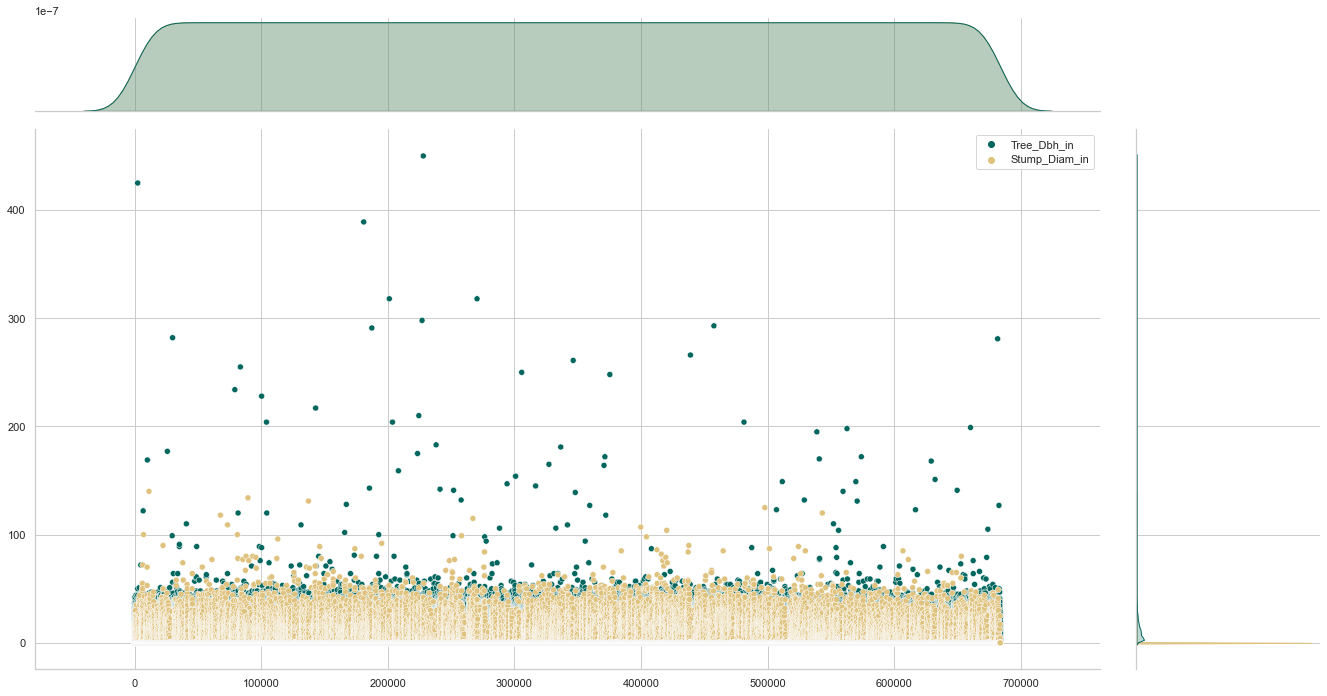

In [47]:
# Vsualize subset

#Plot
sns.jointplot(data = treeSubset,
              palette = ['#01665e',
                         '#dfc27d'])

# Customize
plt.gcf().set_size_inches(20, 10)

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Tree_and_Stump_Overview_Plot.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-1:** The majority of stumps remained consistent with a diameter size of 50-60 inches. However, there were plenty that exceeded that diameter size, suggesting the possibility of human error or environmental impacts. For tree diameters, the distribution was heavily concentrated between 50-60 inches, although there were plenty in the range of 100-200 inches, followed by a decrease in frequency above the 200-inch mark. The distribution ranged from 0 to just below 700,000 trees.

Let me zoom in on the `Tre_Dbh_in` and `Stump_Diam_in` features, individually.

In [48]:
#R Tree Diameter: Execute subset function
# treeSubset cols: Tree_Id / Tree_Dbh_in

treeDiam = subset(treeSubset)
treeDiam.head()

,Tree_Dbh_in,Count
0,0,17932
1,1,2899
2,2,41977
3,3,54454
4,4,60372


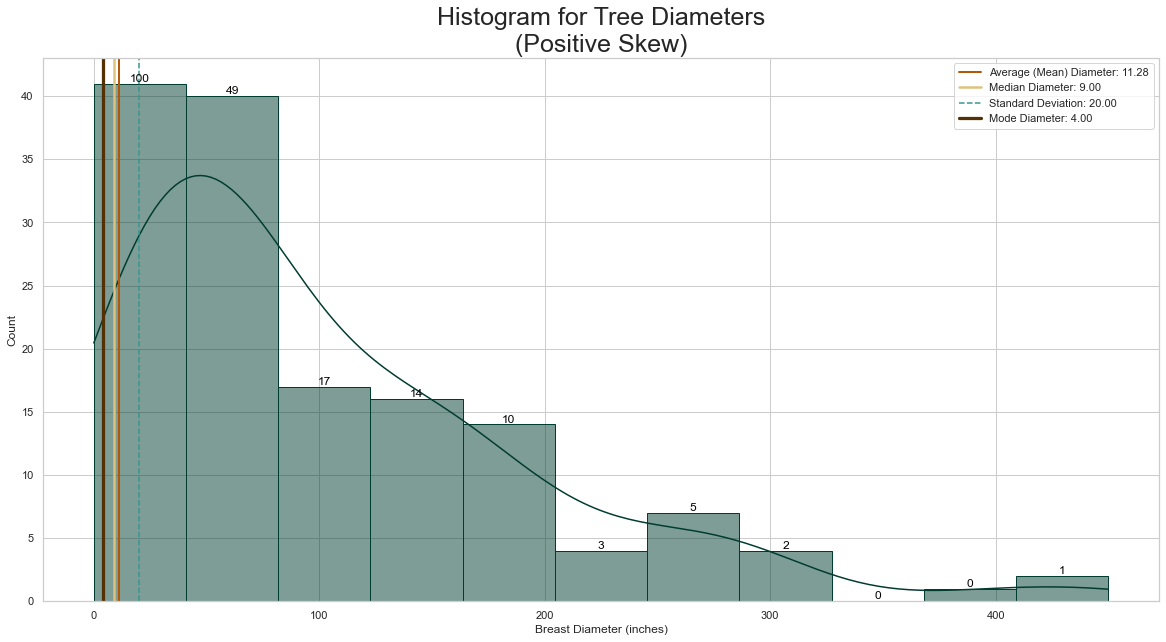

In [49]:
# View tree diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeDHist = sns.histplot(data = treeDiam,
                            x = 'Tree_Dbh_in',
                            color = '#003c30',
                            edgecolor = '#003c30',
                            kde = True,
                            stat = 'count',
                            ax=ax)

# Stats

plt.axvline(treeMean,
            color = '#b35806',
            lw = 2,
            label = f"Average (Mean) Diameter: {treeMean:.2f}")

plt.axvline(treeMed,
            color = '#dfc27d',
            lw = 2.5,
            label = f"Median Diameter: {treeMed:.2f}")

plt.axvline(treeMean + treeStd,
            color = '#35978f',
            linestyle = 'dashed',
            label = f"Standard Deviation: {treeMean + treeStd:.2f}")


plt.axvline(treeMode,
            color = '#543005',
            lw = 3.25,
            label = f"Mode Diameter: {treeMode:.2f}")


# Bar counts credit to SO: User - sentence (#38976)
bVal = 0
for cnts in treeDHist.patches:
    bVal += cnts.get_height()
    treeDHist.text(cnts.get_x() + cnts.get_width() / 2.,
                   cnts.get_height(),
                   '{}'.format(int(cnts.get_height() * 100/bVal)),
                   fontsize = 12,
                   color = 'black',
                   ha = 'center',
                   va = 'bottom')

# Customize fig
treeDHist.set_xlabel('Breast Diameter (inches)')
treeDHist.set_title('Histogram for Tree Diameters\n(Positive Skew)',
                    fontsize = 25)
plt.legend()

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Tree_Diameter_Distribution_without_Binwidth_and_Filtered.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-2:** This `trees'` plot has a DBH (diameter at breast height) of 4 inches, as indicated by the mode of 4, as well as the highest count in the dataset (60372). The median value of 9 indicates that half of the trees in the dataset have a DBH of 9 inches or less. The mean of 11.28 suggests that the average tree in the dataset has a DBH of 11.28 inches. The standard deviation of 20 suggests that the data is quite spread out, with trees ranging in size from 0 to 542 inches.

In [50]:
#R Stump Diameter: Execute subset function
# treeSubset cols: Tree_Id / Stump_Diam_in

stumpDiam = subset(treeSubset)
stumpDiam.head()

,Stump_Diam_in,Count
0,0,666134
1,1,106
2,2,363
3,3,779
4,4,966


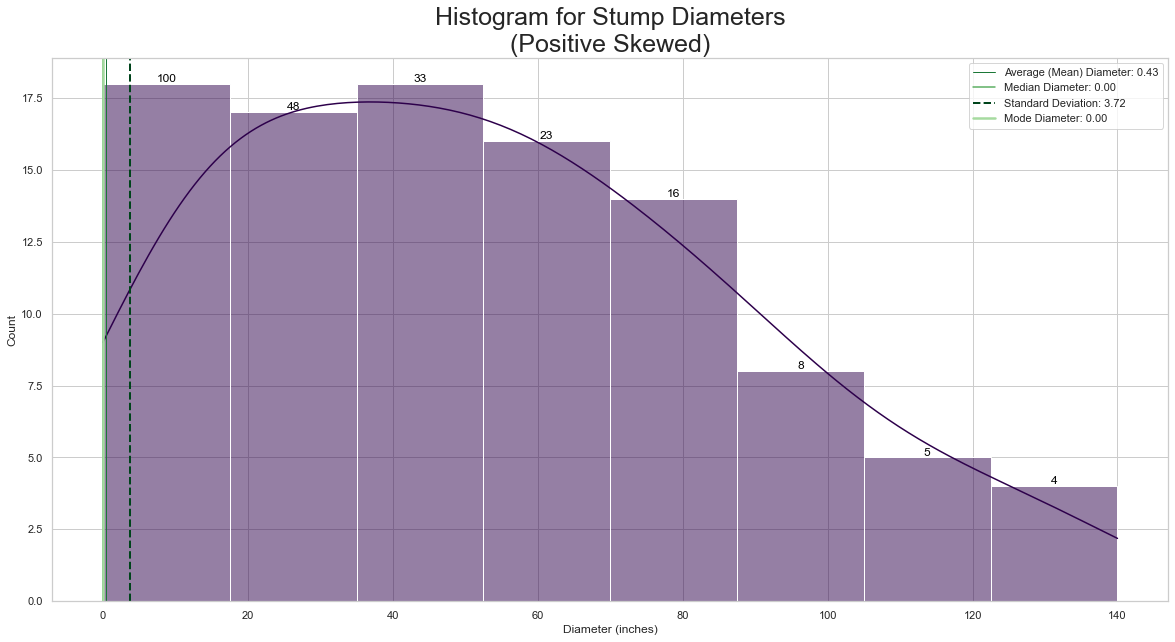

In [51]:
# View stump diameter histogram

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

stumpDHist = sns.histplot(data = stumpDiam,
                            x = 'Stump_Diam_in',
                            color = '#2d004b',
                            kde = True,
                            stat = 'count',
                            ax=ax)

# Stats
plt.axvline(stumpMean,
            color = '#1b7837',
            lw = 1,
            label = f"Average (Mean) Diameter: {stumpMean:.2f}")

plt.axvline(stumpMed,
            color = '#5aae61',
            lw = 1.5,
            label = f"Median Diameter: {stumpMed:.2f}")

plt.axvline(stumpMean + stumpStd,
            color = '#00441b',
            lw = 2,
            linestyle = 'dashed',
            label = f"Standard Deviation: {stumpMean + stumpStd:.2f}")


plt.axvline(stumpMode,
            color = '#a6dba0',
            lw = 2.5,
            label = f"Mode Diameter: {stumpMode:.2f}")


# Bar counts
bVal = 0
for cnts in stumpDHist.patches:
    bVal += cnts.get_height()
    stumpDHist.text(cnts.get_x() + cnts.get_width() / 2.,
                   cnts.get_height(),
                   '{}'.format(int(cnts.get_height() * 100/bVal)),
                   fontsize = 12,
                   color = 'black',
                   ha = 'center',
                   va = 'bottom')


# Customize fig
stumpDHist.set_xlabel('Diameter (inches)')
stumpDHist.set_title('Histogram for Stump Diameters\n(Positive Skewed)',
                    fontsize = 25)
plt.legend()

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Stump_Diameter_Distribution_without_Binwidth_and_Filtered.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-3:** The `stump` plot has a mean of 0.43, median of 0.00, standard deviation of 3.72, and mode of 0.00. The mean and median both indicate that the majority of the stumps have a diameter of 0 inches, which is also seen in the data with the count of 666134 trees. The standard deviation of 3.72 indicates that the stump diameters have a high variability, with some stumps having diameters up to 140 inches. The mode of 0.00 indicates that the most common diameter among the stumps is 0 inches.

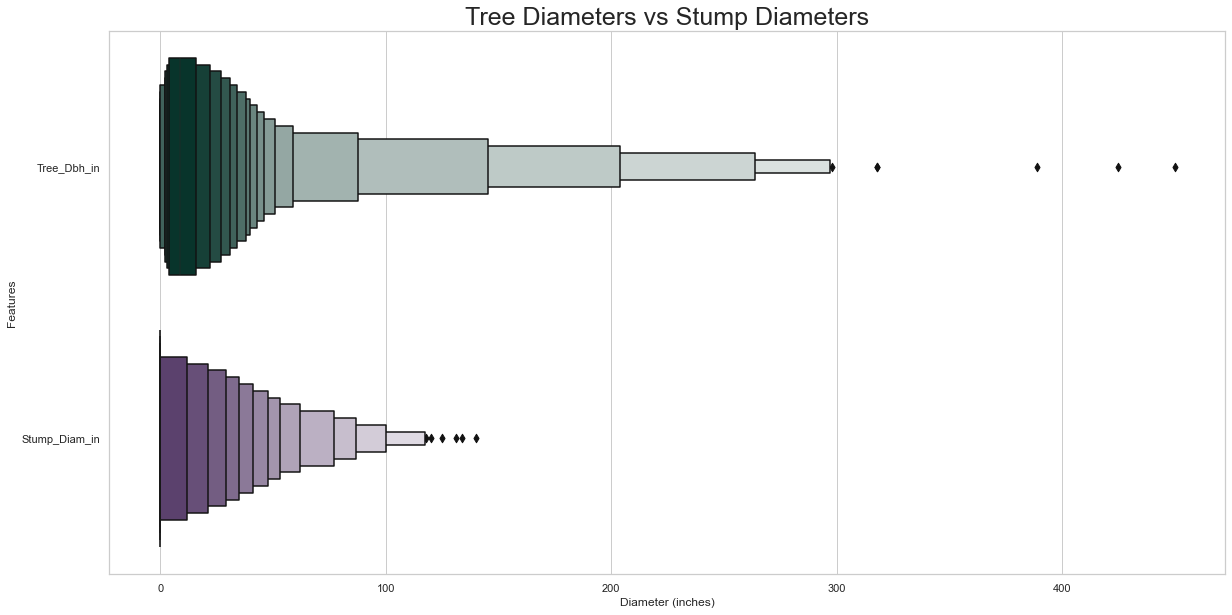

In [52]:
# View outliers of tree and stump diameter

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

treeOutliers = sns.boxenplot(data = treeSubset[["Tree_Dbh_in", "Stump_Diam_in"]],
                             scale = "linear", 
                             palette = ['#003c30', '#2d004b'], 
                             orient = "h", 
                             ax=ax)

# Customize fig
treeOutliers.set_xlabel('Diameter (inches)')
treeOutliers.set_ylabel('Features')
treeOutliers.set_title('Tree Diameters vs Stump Diameters',
                        fontsize = 25)

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Tree-Stump_Diameter_Outliers.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-4:** The plot above shows the distribution of Tree Diameter (Tree_Dbh_in) and Stump Diameter (Stump_Diam_in) across the data subset. It is evident that the Tree Diameter is much higher than the Stump Diameter, with the median Tree Diameter being 12 inches and the median Stump Diameter being 3 inches. The boxenplot also reveals that there are more `outliers` in the Tree Diameter than the Stump Diameter. This could be an indication that the Tree Diameter measurements are more spread out, with more variation in the values of each tree diameter.

#### Qst: What do these outliers belong to, especially in the tree diameter?

In [53]:
# View outliers

treeOutly = treeSubset[treeSubset['Tree_Dbh_in'] == max(treeSubset['Tree_Dbh_in'])]
stumpOutly = treeSubset[treeSubset['Stump_Diam_in'] == max(treeSubset['Stump_Diam_in'])]

outliers = pd.concat([treeOutly, stumpOutly], ignore_index=True)
outliers

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,433258,450,0,OffsetFromCurb,Dead,Not Applicable,2015-11-05,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
1,206819,0,140,OnCurb,Stump,Not Applicable,2015-09-06,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


Interestingly, both tree types can't be determined by their scientific names and might suggest that their diameters were entered incorrectly.

# [Features `Root_Stone... Brch_Other`](#table-of-contents)

#### Qst: Which was the greater problem in 2015?

In [54]:
#R Subset with tree problems

treeProblemResponses = treeSubset[['Root_Stone',
                                   'Root_Grate',
                                   'Root_Other',
                                   'Trunk_Wire',
                                   'Trnk_Light',
                                   'Trnk_Other',
                                   'Brch_Light',
                                   'Brch_Shoe',
                                   'Brch_Other']]
treeProblemResponses.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No


In [55]:
#R Filter the tree and stump problem (bool responses)

treeProblemResponses = treeProblemResponses.apply(pd.Series.value_counts).reset_index()
treeProblemResponses

,index,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other
0,No,543789,680252,653466,670514,682757,651215,621423,683377,659433
1,Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [56]:
#R Execute subset function
# treeSubset cols: Tree_Id / Root_Stone, Root_Grate, Root_Other, Trunk_Wire, Trnk_Light, Trnk_Other, Brch_Light, Brch_Shoe, Brch_Other

probResponses = subset(treeSubset)
probResponses.head()

,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,Count
0,No,No,No,No,No,No,No,No,No,457944
1,No,No,No,No,No,No,No,No,Yes,8352
2,No,No,No,No,No,No,No,Yes,No,103
3,No,No,No,No,No,No,No,Yes,Yes,13
4,No,No,No,No,No,No,Yes,No,No,29452


In [57]:
#R Melt responses

probResponses = probResponses.melt(id_vars = ['Count'],
                                   value_vars = ['Root_Stone',
                                                 'Root_Grate',
                                                 'Root_Other',
                                                 'Trunk_Wire',
                                                 'Trnk_Light',
                                                 'Trnk_Other',
                                                 'Brch_Light',
                                                 'Brch_Shoe',
                                                 'Brch_Other'],
                                   var_name = "Problems",
                                   value_name = "Responses")
probResponses.head()

,Count,Problems,Responses
0,457944,Root_Stone,No
1,8352,Root_Stone,No
2,103,Root_Stone,No
3,13,Root_Stone,No
4,29452,Root_Stone,No


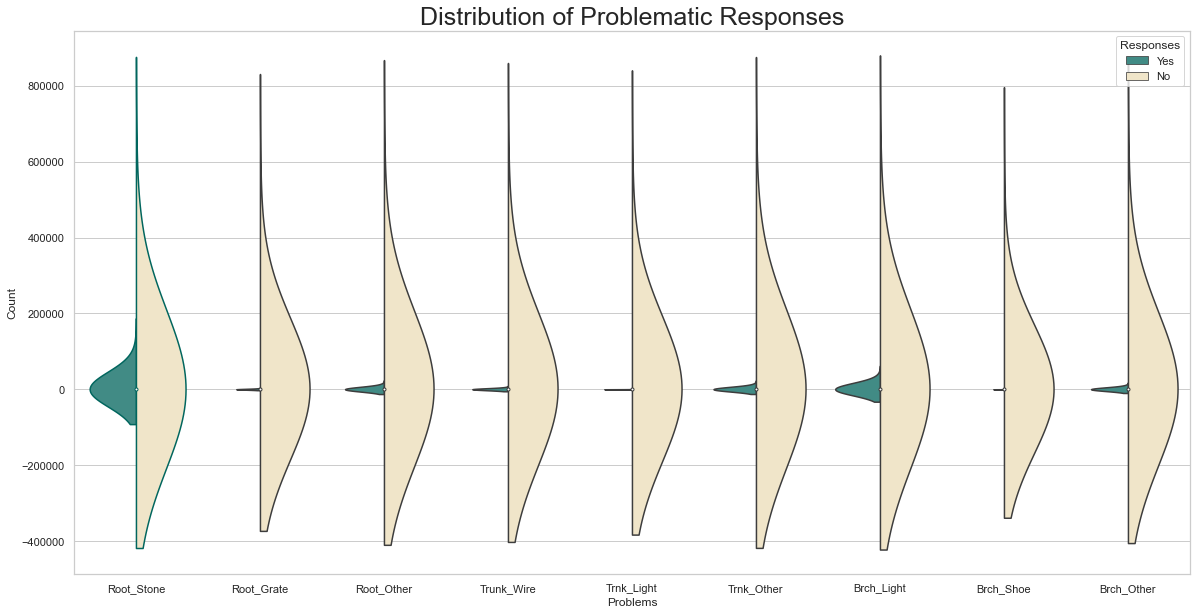

In [58]:
# Visualise responses

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
probVio = sns.violinplot(data = probResponses,
                          y = 'Count',
                          x = 'Problems',
                          split = True,
                          hue = 'Responses',
                          hue_order = ['Yes',
                                       'No'],
                          palette = ['#35978f',
                                     '#f6e8c3'],
                          bw = 5.0, # 'scott' / 'silverman' / 0.5
                          scale = 'count',
                          ax=ax)

# Customise fig
plt.setp(ax.collections[:3:], edgecolor="#01665e")
ax.set_xlabel('Problems')
ax.set_ylabel('Count')
ax.set_title('Distribution of Problematic Responses',
                    fontsize = 25)

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Tree-Stump_Problems.png',
            facecolor="white")

# Plot figv
plt.show()

**figure-5:** This plot shows the distribution of `boolean responses` to a survey about the number of problems each street tree might have. The x-axis indicates the number of problems visible, ranging from 0 to 10 different varieties. The y-axis indicates the count of responses. The violins are split by the two booelean responses chosen, with the left side representing the number of 'Yesses' and the right side representing the number of 'Nos'. The width of the violins indicates the count of responses recorded, with wider violins indicating more records. From the plot, we can see that the majority of responses were 'No', with most workers reporting 0-2 problems. The 'Yes' responses had more variance, with more workers reporting higher numbers of problems. This suggests that there may be some issues with the trees' roots, especially once they were introduced with paving stones on the tree bed.

With `Root_Stone` showing to be the biggest problem from 2015 to 2016, this might not be conclusive given that the plot also revealed wider violins, representing more records. So, **were root stones really problematic** or **were there more root stones being laid over tree beds**?

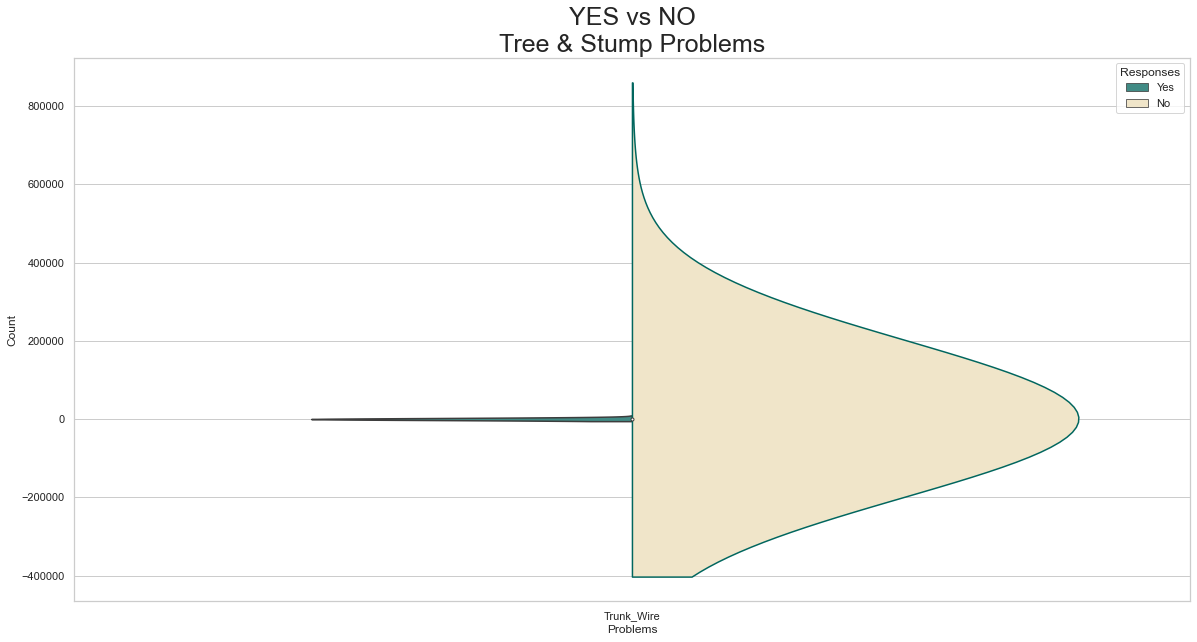

In [59]:
# Visualise responses

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
probVio = sns.violinplot(data = probResponses[probResponses['Problems'] == max(probResponses['Problems'])],
                          y = 'Count',
                          x = 'Problems',
                          split = True,
                          hue = 'Responses',
                          hue_order = ['Yes',
                                       'No'],
                          palette = ['#35978f',
                                     '#f6e8c3'],
                          bw = 5.0,
                          scale = 'count',
                          ax=ax)

# Customise fig
plt.setp(ax.collections[2], edgecolor="#01665e")
ax.set_xlabel('Problems')
ax.set_ylabel('Count')
ax.set_title('YES vs NO\nTree & Stump Problems',
                    fontsize = 25)

# Save fig
# plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\YES_vs_NO_Tree-Stump_Problems.png',
#            facecolor="white")

# Plot fig
plt.show()

**figure-6:** The plot above provides an overview of the boolean responses. It shows the distribution of the data across the categories (roots, trunks, branches...etc) and responses (Yes and No). The violin plot also allows for a comparison of the counts between the different categories and responses combined. For example, it can be seen that the counts for the No response are much higher than the counts for the Yes response, collectively.

# Additional Subset: Alive Trees<br />
Now I will separate `Alive` trees from `Stump/Dead` trees because the alive trees are the largest `Status` type.

In [60]:
#R Filter Alive frm Dead/Stumps Dead

aliveTreeSubset = treeSubset\
                    .loc[(treeSubset['Status'] == 'Alive') & (treeSubset['Status'] != 'Dead')]

In [61]:
# Group alive trees by species name

aliveTreeSubset.groupby('Spc_Latin')['Tree_Dbh_in'].describe().head()

,count,mean,std,min,25%,50%,75%,max
Spc_Latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2550.0,7.126275,4.437674,0.0,4.0,6.0,9.0,64.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0


For the alive tree table there are minimum vals of 0 (zero), which it shouldn't be, and the max values seem to be too large. I also noticed that the 25% to 75% ranges look accurate so I will use these two measurables as references.<br /><br />
Firstly, let me check for `Tree_Dbh` vals that are lower than 25%, and if they are; I'll just modify all the rows to reflect a 25% value and vice versa for the 75% range.

In [62]:
#R Group 25% and 75% tree diameters with its scientific name

aliveStats = aliveTreeSubset\
                .groupby('Spc_Latin', observed=True) \
                .agg(alve25 = ('Tree_Dbh_in', Quantile(0.25)),
                     alve75 = ('Tree_Dbh_in', Quantile(0.75))) \
                .reset_index()[['Spc_Latin',
                                'alve25',
                                'alve75']]
aliveStats.head()

,Spc_Latin,alve25,alve75
0,Acer rubrum,5.0,14.0
1,Quercus palustris,8.0,24.0
2,Gleditsia triacanthos var. inermis,6.0,13.0
3,Tilia americana,4.0,12.0
4,Platanus x acerifolia,16.0,27.0


In [63]:
#R Merge alive stat table with alive tree subset

aliveTreeSubset = aliveTreeSubset\
                    .merge(aliveStats,
                           on = 'Spc_Latin',
                           how = 'left')
aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,alve25,alve75
0,180683,3,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


In [64]:
#R Compare min/max to 25%/75% and modify if conditions are true for tree diameter

stats25Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['alve25']
aliveTreeSubset\
    .loc[stats25Mask, 'Tree_Dbh_in'] = aliveTreeSubset['alve25']

stats75Mask = aliveTreeSubset['Tree_Dbh_in'] < aliveTreeSubset['alve75']
aliveTreeSubset\
    .loc[stats75Mask, 'Tree_Dbh_in'] = aliveTreeSubset['alve75']

In [65]:
# View modified alive tree subsets

aliveTreeSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,alve25,alve75
0,180683,14.0,0,OnCurb,Alive,Fair,2015-08-27,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,24.0,0,OnCurb,Alive,Fair,2015-09-03,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,13.0,0,OnCurb,Alive,Good,2015-09-05,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21.0,0,OnCurb,Alive,Good,2015-08-30,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No,4.0,12.0


# [Feature: `Tree Diameter` - (Alive)](#table-of-contents)

#### Qst: How are the conditions in relation to total tree diameter?

In [66]:
# Filter tree diameter with conditions
# aliveTreeSubset cols: Tree_Id / Tree_Dbh_in, Status, Health

aliveTreeSubset = subset(aliveTreeSubset)
aliveTreeSubset.head()

,Tree_Dbh_in,Status,Health,Count
0,3.00,Alive,Fair,87
1,3.00,Alive,Good,347
2,3.00,Alive,Poor,35
3,3.25,Alive,Fair,38
4,3.25,Alive,Good,165


In [67]:
# Melt alive tree sub

tree = aliveTreeSubset.melt(id_vars = ['Tree_Dbh_in',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
tree.head()

,Tree_Dbh_in,Count,Type,Condition
0,3.00,87,Status,Alive
1,3.00,347,Status,Alive
2,3.00,35,Status,Alive
3,3.25,38,Status,Alive
4,3.25,165,Status,Alive


In [68]:
pd.DataFrame(tree['Condition'].values).value_counts()

Alive    297
Good     136
Fair      87
Poor      74
dtype: int64

In [69]:
# All alive

alve = tree[tree['Condition'] == 'Alive'].count()['Condition']
print(f'There are {alve} alive trees!')


There are 297 alive trees!


In [70]:
# N/A

notApp = tree[tree['Condition'] == 'Not Applicable'].count()['Condition']
print(f'There are {notApp} not applicable trees!')

There are 0 not applicable trees!


In [71]:
# All fair

fair = tree[tree['Condition'] == 'Fair'].count()['Condition']
print(f'There are {fair} fair trees!')

There are 87 fair trees!


In [72]:
# All good

good = tree[tree['Condition'] == 'Good'].count()['Condition']
print(f'There are {good} good trees!')

There are 136 good trees!


In [73]:
# All poor

poor = sum(tree['Condition'] == 'Poor')
print(f'There are {poor} poor trees!')

There are 74 poor trees!


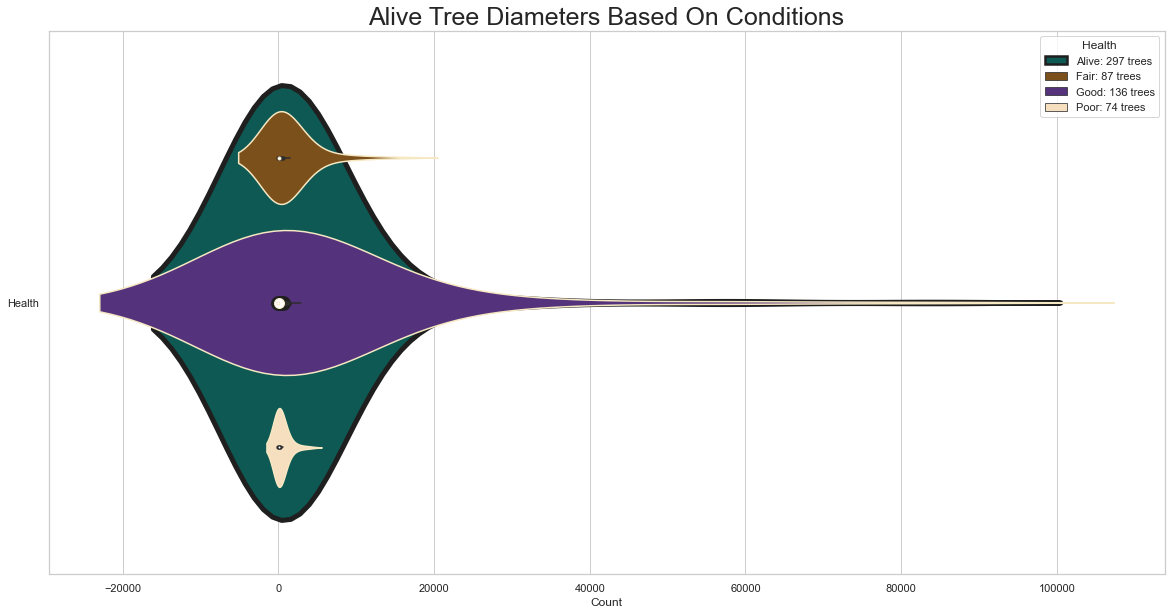

In [74]:
# Visualize alive trees

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
sns.violinplot(data = tree[tree['Condition'] == 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#01665e'],
               linewidth = 5,
               bw = 1,
               scale = 'count',
               ax=ax)

sns.violinplot(data = tree[tree['Condition'] != 'Alive'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               size = 'Count',
               palette = ['#8c510a',
                          '#542788',
                          '#fee0b6',
                          '#80cdc1'],
               bw = 1,
               scale = 'count',
               ax=ax)


# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#f6e8c3")
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.legend(title ='Health',
          handles = ax.legend_.legendHandles,
          labels = [f'Alive: {alve} trees',
                    f'Fair: {fair} trees',
                    f'Good: {good} trees',
                    f'Poor: {poor} trees',
                    f'N/A: {notApp} trees'])
ax.set_title('Alive Tree Diameters Based On Conditions',
            fontsize = 25)

# Save fig      
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Alive_Tree_Diameter_By_Health-Status_Conditions.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-7:** Out of the 450 observations, `297 trees` were found to be in an `"Alive"` condition, representing 65.78% of the total observations. This is a positive sign as it suggests that the majority of trees in the area are healthy and thriving. `87 trees` were found to be in a `"Fair"` condition, representing 19.33% of the total observations. This indicates that a significant number of trees are not in the best of health, but are still able to survive. `136 trees` were found to be in a `"Good"` condition, representing 30.22% of the total observations. This shows that there is a considerable number of healthy trees in the area, providing an opportunity for the population to grow and thrive. `74 trees` were found to be in a `"Poor"` condition, representing 16.44% of the total observations. This suggests that there is a need for improvement in the management and care of these trees to ensure their survival. In conclusion, the study provides a snapshot of the current condition of the trees in the area. The majority of trees are in good health, but there is a need to focus on the improvement and care of the trees in "Fair" and "Poor" condition.

# Additional Subset: Stumps

In [75]:
# Filter stumps w/status of stump 

stumpSubset = treeSubset[treeSubset['Status'] == 'Stump']

In [76]:
stumpSubset['Stump_Diam_in'].describe()

count    17654.000000
mean        16.750481
std         12.082281
min          1.000000
25%          7.000000
50%         14.000000
75%         23.000000
max        140.000000
Name: Stump_Diam_in, dtype: float64

In [77]:
# Group 25% and 75% tree diameters

stumpStats = stumpSubset.groupby('Tree_Id', observed=True)\
                            .agg(stmp25 = ('Stump_Diam_in', Quantile(0.25)),
                                 stmp75 = ('Stump_Diam_in', Quantile(0.75))) \
                            .reset_index()[['Tree_Id',
                                            'stmp25',
                                            'stmp75']]
stumpStats.head()

,Tree_Id,stmp25,stmp75
0,211205,16.0,16.0
1,203597,15.0,15.0
2,179766,30.0,30.0
3,180619,10.0,10.0
4,208828,15.0,15.0


In [78]:
# Merge alive stump table with alive stump subset

stumpSubset = stumpSubset.merge(stumpStats,
                                on = 'Tree_Id',
                                how = 'left')
stumpSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,stmp25,stmp75
0,211205,0,16,OnCurb,Stump,Not Applicable,2015-09-09,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,16.0,16.0
1,203597,0,15,OnCurb,Stump,Not Applicable,2015-09-04,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0
2,179766,0,30,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,30.0,30.0
3,180619,0,10,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,10.0,10.0
4,208828,0,15,OnCurb,Stump,Not Applicable,2015-09-08,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0


In [79]:
# Compare min/max to 25%/75% and modify if conditions are true for stump diameter

stump25Mask = stumpSubset['Stump_Diam_in'] < stumpSubset['stmp25']
stumpSubset\
    .loc[stump25Mask, 'Stump_Diam_in'] = stumpSubset['stmp25']

stump75Mask = stumpSubset['Stump_Diam_in'] < stumpSubset['stmp75']
stumpSubset\
    .loc[stump75Mask, 'Stump_Diam_in'] = stumpSubset['stmp75']

In [80]:
# View modified alive stump subsets

stumpSubset.head()

,Tree_Id,Tree_Dbh_in,Stump_Diam_in,Curb_Loc,Status,Health,Created_At,Spc_Latin,Steward,Sidewalk,Problems,Root_Stone,Root_Grate,Root_Other,Trunk_Wire,Trnk_Light,Trnk_Other,Brch_Light,Brch_Shoe,Brch_Other,stmp25,stmp75
0,211205,0,16,OnCurb,Stump,Not Applicable,2015-09-09,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,16.0,16.0
1,203597,0,15,OnCurb,Stump,Not Applicable,2015-09-04,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0
2,179766,0,30,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,30.0,30.0
3,180619,0,10,OnCurb,Stump,Not Applicable,2015-08-27,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,10.0,10.0
4,208828,0,15,OnCurb,Stump,Not Applicable,2015-09-08,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No,15.0,15.0


# [Feature: `Stump Diameter` - (Stumps)](#table-of-contents)

#### Qst: How are the conditions in relation to total stump diameter?

In [81]:
# Filter stump diameter with conditions
# aliveTreeSubset cols: Tree_Id / Stump_Diam_in, Status, Health

stumpTable = stumpSubset\
    .groupby(['Stump_Diam_in', 'Status', 'Health'], observed=True)['Tree_Id']\
    .count()\
    .reset_index(name='Count')
stumpTable.head()

,Stump_Diam_in,Status,Health,Count
0,1,Stump,Not Applicable,106
1,2,Stump,Not Applicable,363
2,3,Stump,Not Applicable,779
3,4,Stump,Not Applicable,966
4,5,Stump,Not Applicable,939


In [82]:
# Melt alive stump sub

stump = stumpTable.melt(id_vars = ['Stump_Diam_in',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
stump.head()

,Stump_Diam_in,Count,Type,Condition
0,1,106,Status,Stump
1,2,363,Status,Stump
2,3,779,Status,Stump
3,4,966,Status,Stump
4,5,939,Status,Stump


In [83]:
# Filter stump trees

stmpDF = stump\
           .groupby('Stump_Diam_in')['Condition']\
           .value_counts()
len(stmpDF)

198

In [84]:
# All stump

stm = sum(stump['Condition'] == 'Stump')
print(f'There are {stm} stumps!')

There are 99 stumps!


In [85]:
# All n/a

nA = sum(stump['Condition'] == 'Not Applicable')
print(f'There are {nA} not applicable trees!')

There are 99 not applicable trees!


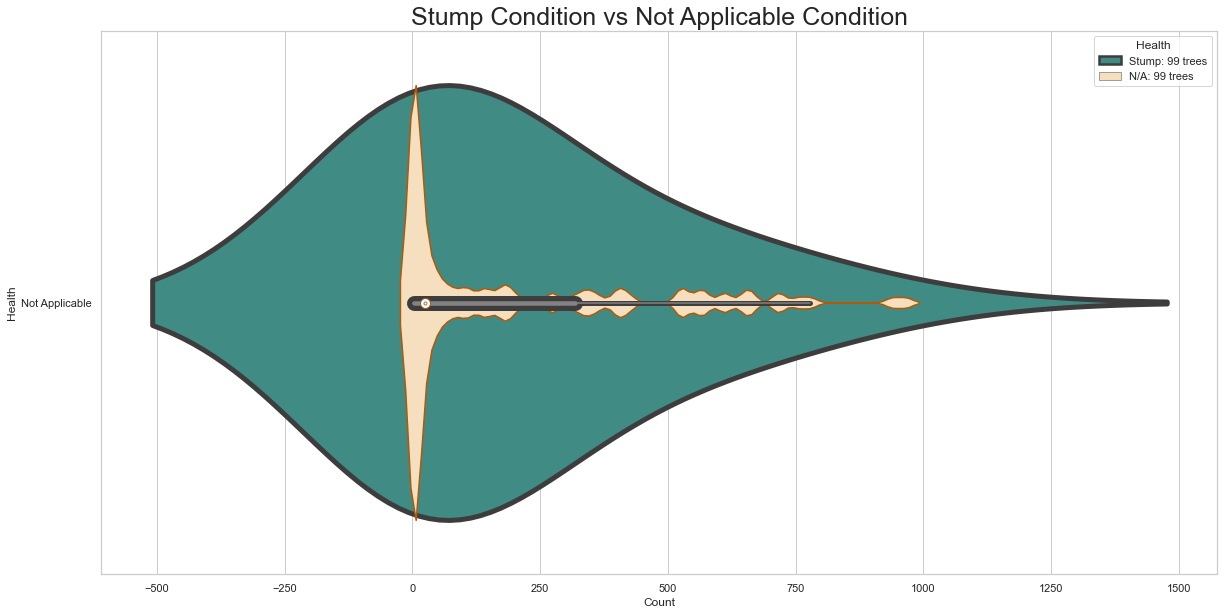

In [86]:
# Visualize alive trees

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot both summaries above
sns.violinplot(data = stump[stump['Condition'] == 'Stump'],
               x = 'Count',
               y = 'Type',
               hue = 'Condition',
               palette = ['#35978f'],
               linewidth = 5,
               bw = 1,
               scale = 'count',
               ax=ax)

sns.violinplot(data = stump[stump['Condition'] != 'Stump'],
               x = 'Count',
               y = 'Condition',
               hue = 'Condition',
               palette = ['#fee0b6'],
               bw = 0.05,
               scale = 'count',
               ax=ax)

# Customize fig
plt.setp(ax.collections[1:-1], edgecolor="#b35806")
ax.set_xlabel('Count')
ax.set_ylabel('Health')
ax.legend(title ='Health',
          handles = ax.legend_.legendHandles,
          labels = [f'Stump: {stm} trees',
                    f'N/A: {nA} trees',])
ax.set_title('Stump Condition vs Not Applicable Condition',
            fontsize = 25)

# Save fig      
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Stump_Diameter_By_Health-Status_Conditions.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-8:** The plot above shows that there are 99 observations for both `Stumps` and `Not Applicable` trees. The Not Applicable plot appears to be thinner and narrower compared to the Stump plot. This suggests that the diameters in the Not Applicable category are more tightly clustered around a certain value, whereas the diameters in the Stump category are more spread out and varied. Overall, the data gives us information about the diameters of different observations and allows us to compare the distribution of diameters between the two categories.

# [Feature: `Created At`](#table-of-contents)

#### Qst: How active is the date range?

In [87]:
# Subset with tree status, health, and date of creation 

dateFrame = treeSubset[['Tree_Id',
                        'Created_At']].copy()
dateFrame.head()

,Tree_Id,Created_At
0,180683,2015-08-27
1,200540,2015-09-03
2,204026,2015-09-05
3,204337,2015-09-05
4,189565,2015-08-30


In [88]:
# Filter date table
# date table cols: Tree_Id / Created_At

dteTable = subset(dateFrame)
dteTable.head()

,Created_At,Count
0,2015-05-19,398
1,2015-05-20,518
2,2015-05-21,361
3,2015-05-22,520
4,2015-05-23,181


In [89]:
# Bin the table for plot

dteTable['Bin'] = pd.cut(dteTable['Created_At'], 12)
pd.DataFrame(dteTable['Bin'].unique())

,0
0,"(2015-05-18 11:52:48, 2015-06-30 02:00:00]"
1,"(2015-06-30 02:00:00, 2015-08-11 04:00:00]"
2,"(2015-08-11 04:00:00, 2015-09-22 06:00:00]"
3,"(2015-09-22 06:00:00, 2015-11-03 08:00:00]"
4,"(2015-11-03 08:00:00, 2015-12-15 10:00:00]"
5,"(2015-12-15 10:00:00, 2016-01-26 12:00:00]"
6,"(2016-01-26 12:00:00, 2016-03-08 14:00:00]"
7,"(2016-03-08 14:00:00, 2016-04-19 16:00:00]"
8,"(2016-04-19 16:00:00, 2016-05-31 18:00:00]"
9,"(2016-05-31 18:00:00, 2016-07-12 20:00:00]"


In [90]:
# Create labels for date table bins

dteTable['Bin'] = pd.cut(dteTable['Created_At'],
                         12,
                         labels = ['2015/05/18 - 2015/06/30',
                                   '2015/06/30 - 2015/08/11',
                                   '2015/08/11 - 2015/09/22',
                                   '2015/09/22 - 2015/11/03',
                                   '2015/11/03 - 2015/12/15',
                                   '2015/12/15 - 2016/01/26',
                                   '2016/01/26 - 2016/03/08',
                                   '2016/03/08 - 2016/04/19',
                                   '2016/04/19 - 2016/05/31',
                                   '2016/05/31 - 2016/07/12',
                                   '2016/07/12 - 2016/08/23',
                                   '2016/08/23 - 2016/10/05'])

In [91]:
# Date table bin median

dteMed = dteTable\
           .groupby(['Bin'])['Count']\
           .median()

# offset from median for display
vOffset = dteTable['Count']\
             .median() * 0.05

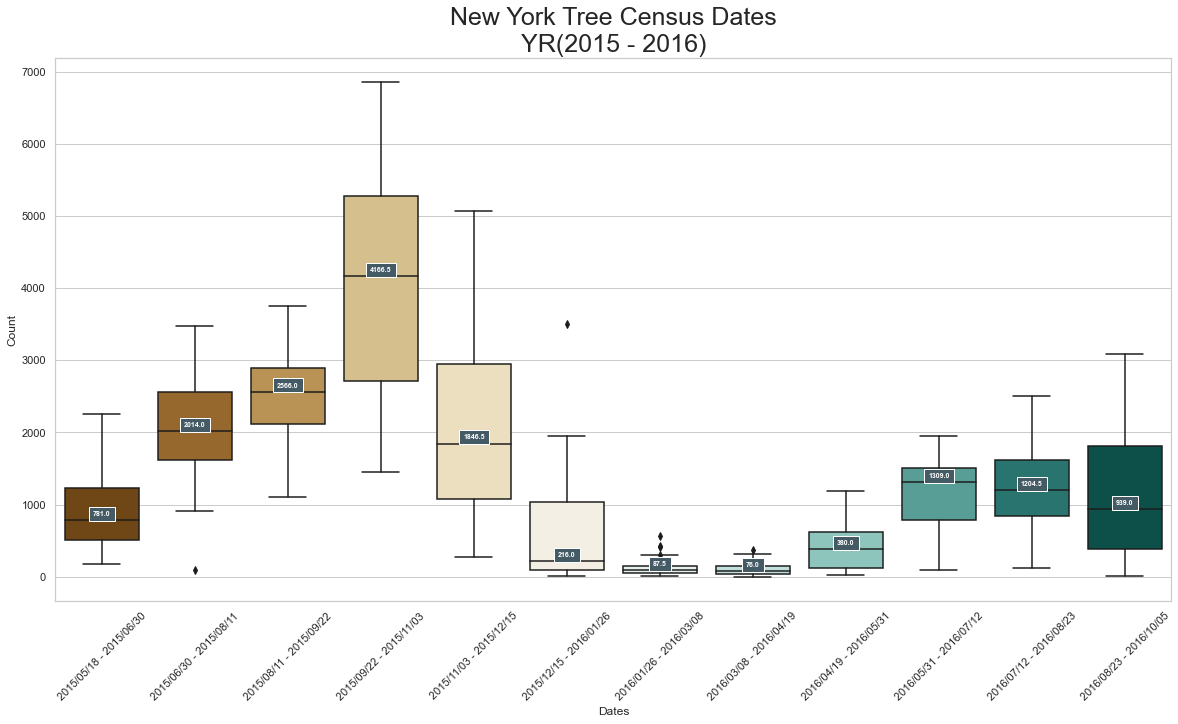

In [93]:
# Visualize

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
dteBP = sns.boxplot(data = dteTable,
                    x = 'Bin',
                    y = 'Count',
                    palette = 'BrBG')


# Iterate and display median credit to SO: user - mechanical_meat
for xtick in dteBP.get_xticks():
    dteBP.text(xtick,
               dteMed[xtick] + vOffset,
               dteMed[xtick], 
               horizontalalignment='center',
               size='x-small',
               color='w',
               weight='semibold',
               bbox=dict(facecolor='#445A64'))
               

# Customize
ax.set_xlabel('Dates')
ax.set_ylabel('Count')
plt.xticks(rotation = 45)
plt.title('New York Tree Census Dates\nYR(2015 - 2016)',
         size = 25)

# Save fig
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\2015_New_York_Tree_Census_Dates.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-9:** The plot above shows the distribution of "Count" values and a grouped date range or ("Bin"). We can see that the bins with no ouliers, indicates that all values are within their range defined by their IQR. In contrast, bins with maximum outliers, indicate that there are values that are obviuosly higher and outside their range defined by their IQR. With the first bin having a median of 781.0 and its box being relatively small, shows that the "Count" values for this date range are tightly grouped around the median value. However, bin two has a median of 2014.0, which is significantly higher than the first bin, and it has a slightly larger box, showing that "Count" values for this date range are slightly more spread out. This suggests that the "Count" values changed over time, with values generally increasing and becoming more dispersed.

# Additional Subset: Combined Features

In [94]:
# Subset with tree status, health, and date of creation 

subsetFeats1 = treeSubset[['Tree_Id',
                        'Created_At',
                        'Spc_Latin',
                        'Curb_Loc',
                        'Status',
                        'Health']].copy()
subsetFeats1.head()

,Tree_Id,Created_At,Spc_Latin,Curb_Loc,Status,Health
0,180683,2015-08-27,Acer rubrum,OnCurb,Alive,Fair
1,200540,2015-09-03,Quercus palustris,OnCurb,Alive,Fair
2,204026,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
3,204337,2015-09-05,Gleditsia triacanthos var. inermis,OnCurb,Alive,Good
4,189565,2015-08-30,Tilia americana,OnCurb,Alive,Good


### Add Columns: Month, Day, Year

In [95]:
# Filter the intake subset table
# intake Subset cols: Tree_Id / Created_At, Spc_Latin, Curb_Loc, Status, Health

subsetFeats1 = subset(subsetFeats1)
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4


In [96]:
# Add a month col to store months from Created_At

subsetFeats1['Month'] = pd.to_datetime(subsetFeats1['Created_At']).dt.month
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2,5
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7,5
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1,5
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1,5
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4,5


In [97]:
# Add a day col to store days from Created_At

subsetFeats1['Day'] = pd.to_datetime(subsetFeats1['Created_At']).dt.day
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2,5,19
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7,5,19
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1,5,19
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1,5,19
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4,5,19


In [98]:
# Add a year col to store years from Created_At

subsetFeats1['Year'] = pd.to_datetime(subsetFeats1['Created_At']).dt.year
subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2,5,19,2015
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7,5,19,2015
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1,5,19,2015
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1,5,19,2015
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4,5,19,2015


In [99]:
# Create a month dictionary to use with month column

monthDict = {1: 'jan',
             2: 'feb',
             3: 'mar',
             4: 'apr',
             5: 'may',
             6: 'jun',
             7: 'jul',
             8: 'aug',
             9: 'sep',
             10: 'oct',
             11: 'nov',
             12: 'dec'}

# map to month col

subsetFeats1['Month'] = subsetFeats1['Month'].map(monthDict)

In [100]:
# Day dictionary to use with day column

dayDict = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th', 6: '6th', 7: '7th', 8: '8th', 9: '9th', 10: '10th',
           11: '11th', 12: '12th', 13: '13th', 14: '14th', 15: '15th', 16: '16th', 17: '17th', 18: '18th',
           19: '19th', 20: '20th', 21: '21st', 22: '22nd', 23: '23rd', 24: '24th', 25: '25th', 26: '26th',
           27: '27th', 28: '28th', 29: '29th', 30: '30th', 31: '31st', 32: '32nd'}

# map to day col

subsetFeats1['Day'] = subsetFeats1['Day'].map(dayDict)

In [101]:
# Year dictionary for year column
# Dataset has only has yrs 2015, 2016

yearDict = {2015: '2015', 2016: '2016'}

# map to yr col

subsetFeats1['Year'] = subsetFeats1['Year'].map(yearDict)

In [102]:
# Calculate a mean column of the counts per month/day/yr

monthlyMean = subsetFeats1\
                .groupby('Month')['Count']\
                .mean()
subsetFeats1['Mean_mth'] = subsetFeats1['Month']\
                                       .map(monthlyMean)

dailyMean = subsetFeats1\
                .groupby('Day')['Count']\
                .mean()
subsetFeats1['Mean_day'] = subsetFeats1['Day']\
                                       .map(dailyMean)

yearlyMean = subsetFeats1\
                .groupby('Year')['Count']\
                .mean()
subsetFeats1['Mean_yr'] = subsetFeats1['Year']\
                                      .map(yearlyMean)

subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year,Mean_mth,Mean_day,Mean_yr
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2,may,19th,2015,6.622854,12.239766,13.449609
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7,may,19th,2015,6.622854,12.239766,13.449609
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1,may,19th,2015,6.622854,12.239766,13.449609
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1,may,19th,2015,6.622854,12.239766,13.449609
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4,may,19th,2015,6.622854,12.239766,13.449609


In [103]:
# Calculate a mediam column of the counts per month/day/yr

monthlyMed = subsetFeats1\
                .groupby('Month')['Count']\
                .median()
subsetFeats1['Median_mth'] = subsetFeats1['Month']\
                                         .map(monthlyMed)

dailyMed = subsetFeats1\
                .groupby('Day')['Count']\
                .median()
subsetFeats1['Median_day'] = subsetFeats1['Day']\
                                         .map(dailyMed)

yearlyMed = subsetFeats1\
                .groupby('Year')['Count']\
                .median()
subsetFeats1['Median_yr'] = subsetFeats1['Year']\
                                        .map(yearlyMed)

subsetFeats1.head()

,Created_At,Spc_Latin,Curb_Loc,Status,Health,Count,Month,Day,Year,Mean_mth,Mean_day,Mean_yr,Median_mth,Median_day,Median_yr
0,2015-05-19,Acer rubrum,OnCurb,Alive,Fair,2,may,19th,2015,6.622854,12.239766,13.449609,2.0,3.0,3.0
1,2015-05-19,Acer rubrum,OnCurb,Alive,Good,7,may,19th,2015,6.622854,12.239766,13.449609,2.0,3.0,3.0
2,2015-05-19,Acer rubrum,OnCurb,Alive,Poor,1,may,19th,2015,6.622854,12.239766,13.449609,2.0,3.0,3.0
3,2015-05-19,Quercus palustris,OnCurb,Alive,Fair,1,may,19th,2015,6.622854,12.239766,13.449609,2.0,3.0,3.0
4,2015-05-19,Quercus palustris,OnCurb,Alive,Good,4,may,19th,2015,6.622854,12.239766,13.449609,2.0,3.0,3.0


# [Features: `Curb Location` By `Conditions`](#table-of-contents)

#### Qst: What side of NY street sidewalks had the most recorded conditions?

In [104]:
# Filter for curb location
# intake Subset cols: Created_At / Spc_Latin, Curb_Loc, Status, Health

curbLocation = subset(subsetFeats1)
curbLocation.head()

,Spc_Latin,Curb_Loc,Status,Health,Count
0,Acer rubrum,OnCurb,Alive,Fair,345
1,Acer rubrum,OnCurb,Alive,Good,426
2,Acer rubrum,OnCurb,Alive,Poor,241
3,Acer rubrum,OffsetFromCurb,Alive,Fair,53
4,Acer rubrum,OffsetFromCurb,Alive,Good,135


In [105]:
# Melt curb table

curbs = curbLocation.melt(id_vars = ['Spc_Latin',
                                     'Curb_Loc',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
curbs.head()

,Spc_Latin,Curb_Loc,Count,Type,Condition
0,Acer rubrum,OnCurb,345,Status,Alive
1,Acer rubrum,OnCurb,426,Status,Alive
2,Acer rubrum,OnCurb,241,Status,Alive
3,Acer rubrum,OffsetFromCurb,53,Status,Alive
4,Acer rubrum,OffsetFromCurb,135,Status,Alive


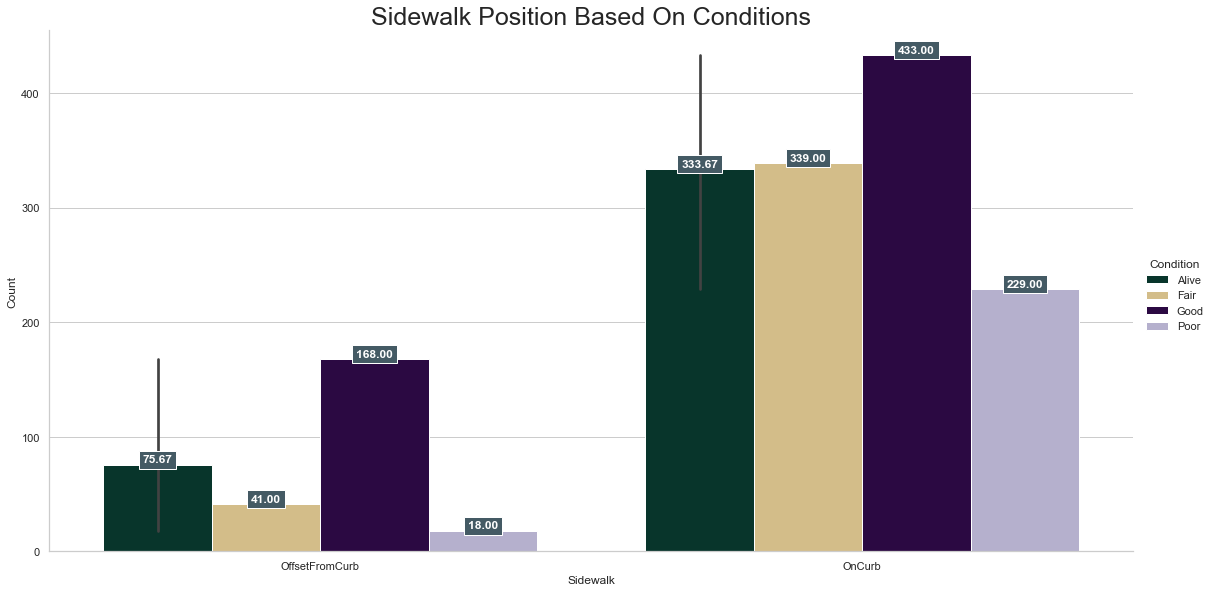

In [106]:
# Visualise sidewalk relation to Conditions


# Plot
sidewalkLocation = sns.catplot(data = curbs[curbs['Spc_Latin'] == max(curbs['Spc_Latin'])],
                               x = 'Curb_Loc',
                               y = 'Count',
                               hue = 'Condition',
                               palette = ['#003c30',
                                          '#dfc27d',
                                          '#2d004b',
                                          '#b2abd2',
                                          '#35978f',
                                          '#ffffbf',
                                          '#4d4d4d'],
                               kind = "bar",
                               height = 8,
                               aspect = 2
)

# Extract the matplotlib axes_subplot objects from the FacetGrid
ax = sidewalkLocation.facet_axis(0, 0)

# Interate through axes containers credit to SO: user Trenton McKinney
for val in ax.containers:
    labl = [f'{(v.get_height() / 1):.2f}' for v in val]
    ax.bar_label(val,
                 labels=labl,
                 label_type='edge',
                 size = 'large',
                 weight = 'semibold',
                 color = 'w',
                 bbox=dict(facecolor='#445A64'))


# Customize fig
sidewalkLocation.set_axis_labels('Sidewalk', 'Count')
plt.title('Sidewalk Position Based On Conditions',
         size = 25)

# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Tree_Species_Location_By_Conditions.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-10:** This plot above shows the distribution of the two places, `(OffsetFromCurb & OnCurb)`, for tree species and their conditions on a `sidewalk` in New York City. There are four conditions and the species of the trees are cobmined and represented as the highest count of each bar. The first category of "OffsetFromCurb" has a height of 75.67 for the first bar, and it is accompanied by an error line. The other three bars have heights of 41.00, 168.00, and 18.00, respectively. The second category of "OnCurb" has an height of 333.67 for the first bar and it is accompanied by an error line, too. The other three bars have heights of 339.00, 433.00, and 229.00. The presence of the error lines only for some of the categories, though, suggests that there is a level of uncertainty or variability in the measurements for those categories. In addition, the differences in height between conditions within each category of "OffsetFromCurb" and "OnCurb" suggests that there may be a difference in the distribution or prevalence of the different conditions for each category. Also, the higher heights for the categories "OnCurb" compared to "OffsetFromCurb" suggest that the observations or occurrences for the conditions in the dataset are more frequent or prevalent when they are "OnCurb."

# [Feature: `Species`](#table-of-contents)

#### Qst: What are the most common trees? 

In [107]:
speciesTable = subsetFeats1['Spc_Latin'].value_counts(sort=True)
pd.DataFrame(speciesTable).head()

,Spc_Latin
Platanus x acerifolia,1689
Quercus palustris,1572
Acer platanoides,1550
Gleditsia triacanthos var. inermis,1525
Pyrus calleryana,1449


In [108]:
# Filter for species name 
# intakeSubset cols: Created_At / Spc_Latin, Year

speciesTot = subset(subsetFeats1)
speciesTot.head()

,Spc_Latin,Year,Count
0,Acer rubrum,2015,784
1,Acer rubrum,2016,438
2,Quercus palustris,2015,945
3,Quercus palustris,2016,627
4,Gleditsia triacanthos var. inermis,2015,934


In [109]:
# Melt species total

speciesTot = speciesTot.melt(id_vars = ['Spc_Latin',
                                        'Count'],
                          value_vars = ['Year'],
                          var_name = "YYYY",
                          value_name = "Years")
speciesTot.head()

,Spc_Latin,Count,YYYY,Years
0,Acer rubrum,784,Year,2015
1,Acer rubrum,438,Year,2016
2,Quercus palustris,945,Year,2015
3,Quercus palustris,627,Year,2016
4,Gleditsia triacanthos var. inermis,934,Year,2015


In [110]:
# Highest species name count each year

speciesTot.groupby('Years').apply(lambda x: x.loc[x['Count'].idxmax(), ['Spc_Latin', 'Count']])

,Spc_Latin,Count
Years,,
2015,Platanus x acerifolia,1023
2016,Acer platanoides,671


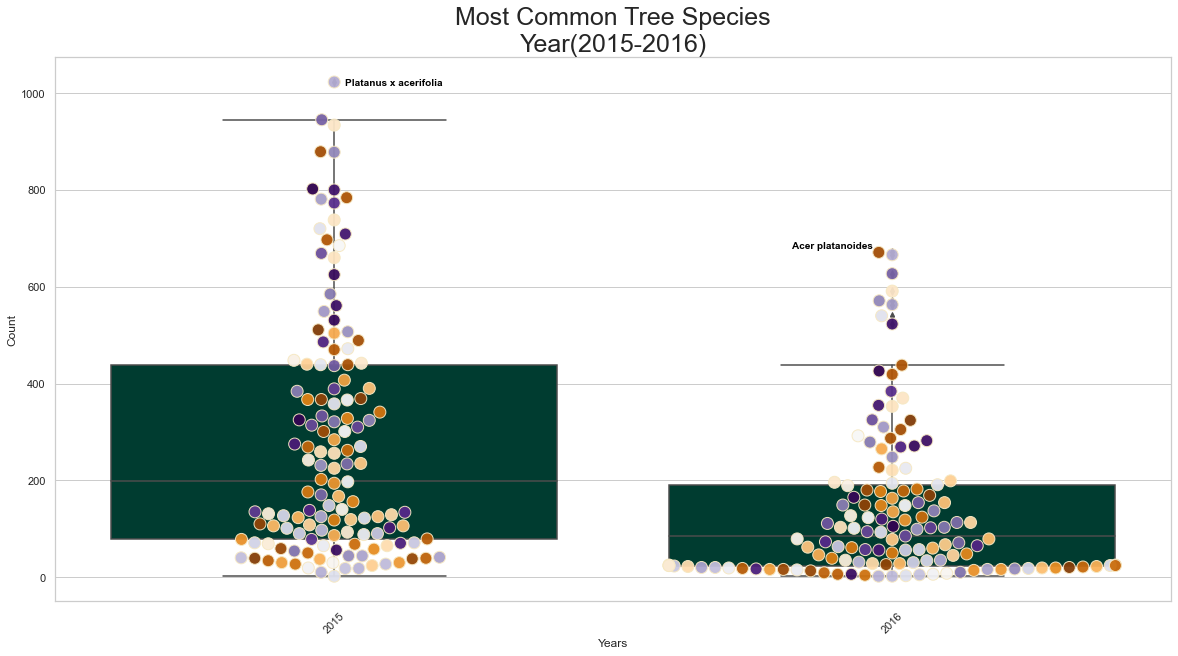

In [111]:
# Visualise species total


# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
sns.swarmplot(data = speciesTot,
                x = 'Years',
                y = 'Count',
                palette = 'PuOr',
                hue = 'Spc_Latin',
                edgecolor = "#f6e8c3",
                linewidth = 1,
                size = 12,
                alpha = 0.95)

sns.boxplot(data = speciesTot,
            x = 'Years',
            y = 'Count',
            dodge = False,
            boxprops={'facecolor':'#003c30'})

# Customize fig
ax.set_xlabel('Years')
ax.set_ylabel('Count')
plt.title('Most Common Tree Species\nYear(2015-2016)',
           size = 25)
plt.xticks(rotation = 45)
ax.get_legend().remove()

#
plt.text(0+0.019, 1015,
         "Platanus x acerifolia",
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(0+0.82, 680,
         "Acer platanoides",
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Most_Tree_Species.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-11:** This plot above shows the distribution of the counts for each `species` represented as points over a `two year time frame`. There are some differences in the distribution of counts between the different years suggesting two things; 1.) that there were a few observations with high counts in 2015 and fewer observations overall in 2016 and 2.) there is some variability in the counts of species across the years.

#### Qst: Which condition has the most tree species? 

In [112]:
# Filter for species name & condition
# intakeSubset cols: Created_At / Spc_Latin, Status, Health

nameTable = subset(subsetFeats1)
nameTable.head()

,Spc_Latin,Status,Health,Count
0,Acer rubrum,Alive,Fair,398
1,Acer rubrum,Alive,Good,561
2,Acer rubrum,Alive,Poor,263
3,Quercus palustris,Alive,Fair,526
4,Quercus palustris,Alive,Good,723


In [113]:
# Melt species name

spcName = nameTable.melt(id_vars = ['Spc_Latin',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
spcName.head()

,Spc_Latin,Count,Type,Condition
0,Acer rubrum,398,Status,Alive
1,Acer rubrum,561,Status,Alive
2,Acer rubrum,263,Status,Alive
3,Quercus palustris,526,Status,Alive
4,Quercus palustris,723,Status,Alive


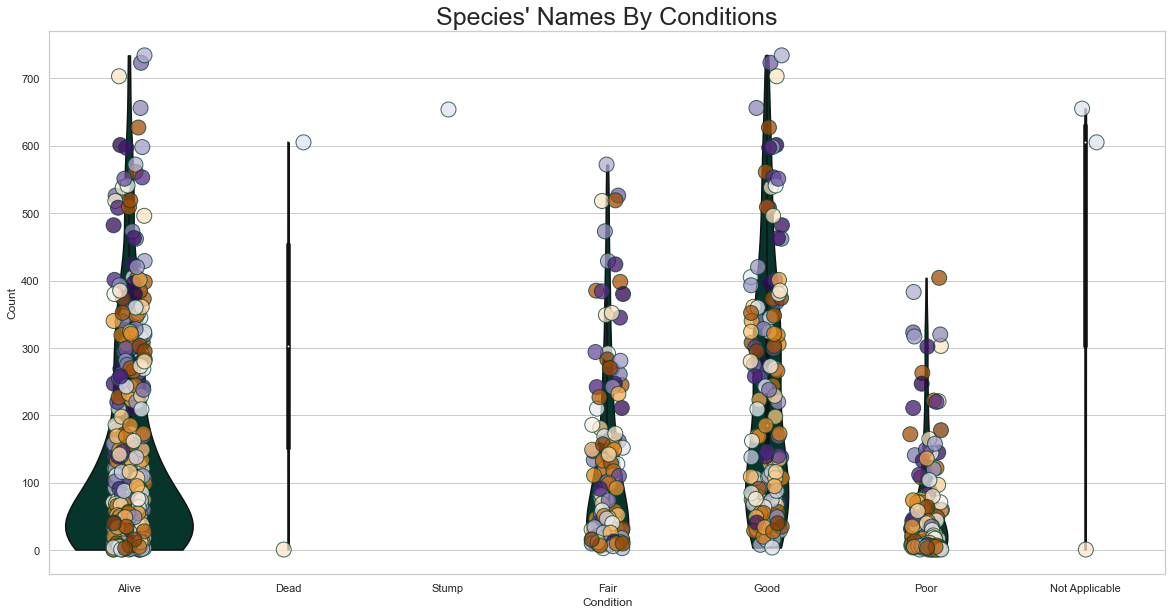

In [115]:
# Visualise species names in relation to Conditions


# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plot
ax = sns.violinplot(data = spcName, 
                  x = 'Condition', 
                  y = 'Count',
                  color = '#003c30',
                  scale = 'count', # 'area' / -->'count' / 'width'
                  cut = 0
)

ax = sns.stripplot(data = spcName, 
              x = 'Condition', 
              y = 'Count', 
              hue = 'Spc_Latin',
              size = 15,
              palette = 'PuOr',
              edgecolor = '#003c30',
              linewidth = 1,
              jitter = True, 
              alpha = .75
)

# Customize fig
ax.set_xlabel('Condition')
ax.set_ylabel('Count')
plt.title("Species' Names By Conditions",
           size = 25)
ax.get_legend().remove()

# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Species_Scientific_Names_By_Conditions.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-12:** The plot above shows the distribution of `species` across different `conditions`. The 'Alive' and 'Poor' conditions have a larger spread of tree species confirmed by their wider bottom violins. Given that the swarmplots cover the 'Poor' condition entirely indicates a large number of individual species of this condition. In contrast, the 'Fair' and 'Good' conditions have narrow violins. They too have swarmplots covering them entirely, suggesting a smaller spread of tree species. The absence of violins for the 'Dead' and 'Not Applicable' conditions suggests less records were taken or that there's a very narrow range of species further pointing to outliers. However, the 'Stump' condition has no violins and only one swarmplot at the top, confirming only one tree species is impacted by this condition.

# [Feature: `Created At` - (Months)](#table-of-contents)

#### Qst: Which month had the most records?

In [116]:
# Evaluate created_at column (top 15)

dateTable = subsetFeats1['Created_At'].value_counts()
pd.DataFrame(dateTable).head(15)

,Created_At
2015-10-13,303
2015-10-26,289
2015-11-03,288
2015-11-02,287
2015-10-27,284
2015-11-04,284
2015-10-30,283
2015-10-14,280
2015-10-20,277
2015-08-29,267


In [117]:
# Filter for dates & conditions
# intakeSubset cols: Created_At / Month, Day, Year, Status, Health

datesConditions = subset(subsetFeats1)
datesConditions.head()

,Month,Day,Year,Status,Health,Count
0,apr,10th,2016,Alive,Good,7
1,apr,10th,2016,Stump,Not Applicable,1
2,apr,11th,2016,Alive,Fair,11
3,apr,11th,2016,Alive,Good,23
4,apr,11th,2016,Alive,Poor,5


In [118]:
# Melt date & conditions

datesConditions = datesConditions\
                    .melt(id_vars = ['Month',
                                     'Day',
                                     'Year',
                                     'Count'],
                          value_vars = ['Status',
                                        'Health'],
                          var_name = "Type",
                          value_name = "Condition")
datesConditions.head()

,Month,Day,Year,Count,Type,Condition
0,apr,10th,2016,7,Status,Alive
1,apr,10th,2016,1,Status,Stump
2,apr,11th,2016,11,Status,Alive
3,apr,11th,2016,23,Status,Alive
4,apr,11th,2016,5,Status,Alive


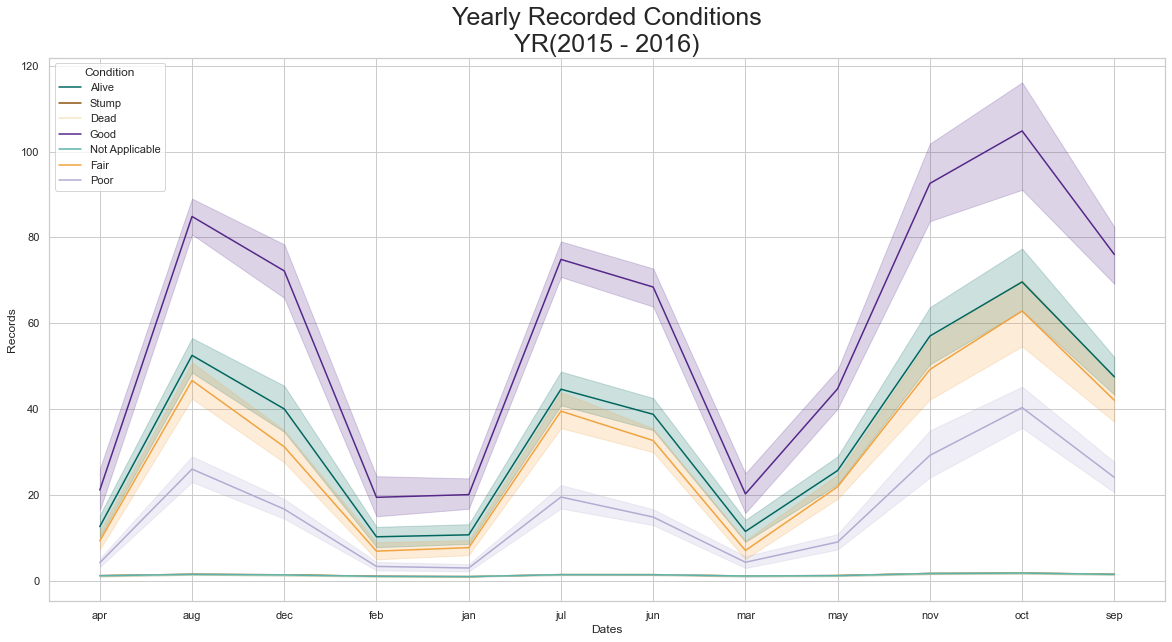

In [119]:
# Visualise when conditions were recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.lineplot(data = datesConditions,
             x = 'Month',
             y = 'Count',
             hue = 'Condition',
             palette = ['#01665e',
                        '#8c510a',
                        '#f6e8c3',
                        '#542788',
                        '#5ab4ac',
                        '#f1a340',
                        '#b2abd2'])
             

# Customize fig
ax.set_xlabel('Dates')
ax.set_ylabel('Records')
plt.title('Yearly Recorded Conditions\nYR(2015 - 2016)',
           size = 25)


# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Recorded_Conditions_for_Two_Years.png',
            facecolor='white')

# Plot fig
plt.show()

**figure-13:** This plot above shows the count of `trees` observed `over two years`, broken down by conditions. It is clear that the counts of trees observed vary widely over time and by each condition. For example, the 'Dead' condition seems to have the lowest counts across all months, with very few trees recorded in this state. Most clearly is the 'Good' condition showing a steady increase in tree counts from February to July, followed by a sharp drop in August and September, and then a slight recovery in October and November. In contrast, the 'Alive' condition shows a relatively constant count of trees observed throughout the years, with a slight dip in August and September. Overall, there is considerable variation in tree counts across the different conditions, and some conditions seem to be more favorable for tree growth than others.

# [Features: `Curb Location` By `Species` ](#table-of-contents)

#### Qstn: Where on a sidewalk are the most common trees?

In [120]:
# Filter for dates & curb location
# intakeSubset cols: Created_At / Curb_Loc, Spc_Latin

datesSidewalk = subset(subsetFeats1)
datesSidewalk.head()

,Curb_Loc,Spc_Latin,Count
0,OnCurb,Acer rubrum,1012
1,OnCurb,Quercus palustris,1117
2,OnCurb,Gleditsia triacanthos var. inermis,1132
3,OnCurb,Tilia americana,921
4,OnCurb,Platanus x acerifolia,1192


In [121]:
# Melt date & curb locations

datesSidewalk = datesSidewalk.melt(id_vars = ['Spc_Latin',
                                              'Count'],
                               value_vars = ['Curb_Loc'],
                               var_name = "Locations",
                               value_name = "Where")
datesSidewalk.head()

,Spc_Latin,Count,Locations,Where
0,Acer rubrum,1012,Curb_Loc,OnCurb
1,Quercus palustris,1117,Curb_Loc,OnCurb
2,Gleditsia triacanthos var. inermis,1132,Curb_Loc,OnCurb
3,Tilia americana,921,Curb_Loc,OnCurb
4,Platanus x acerifolia,1192,Curb_Loc,OnCurb


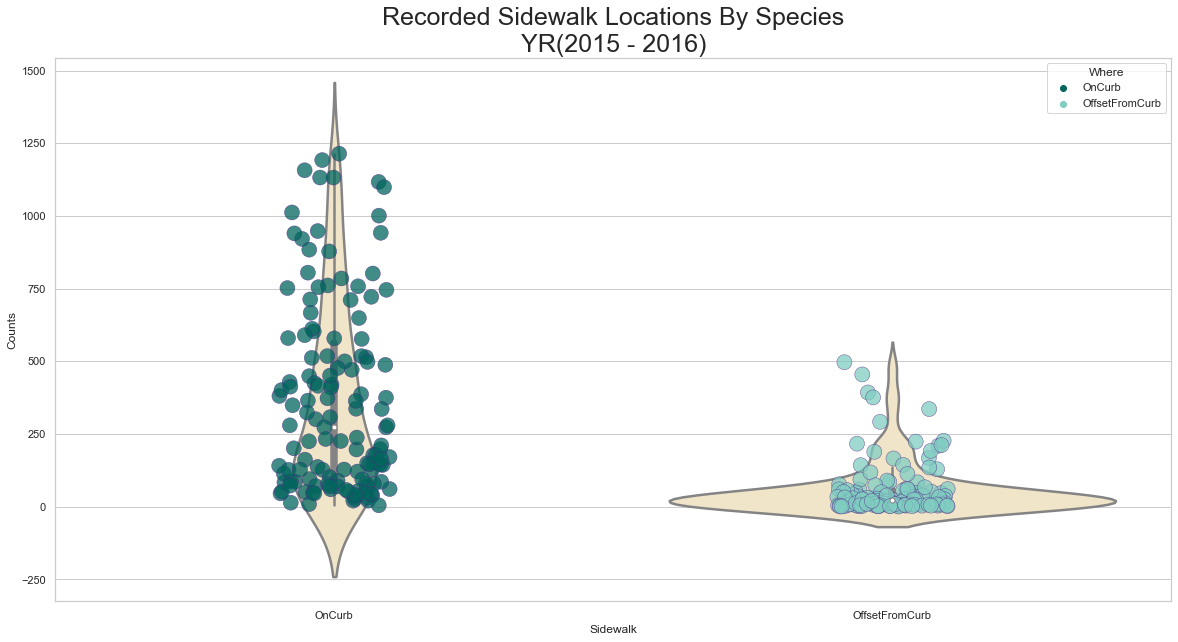

In [125]:
# Visualise recorded curb locations

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
sns.stripplot(data = datesSidewalk,
             x = 'Where',
             y = 'Count',
             hue = 'Where',
             palette = ['#01665e',
                        '#80cdc1',],
             edgecolor = '#542788',
             linewidth = 0.5,
             alpha = 0.75,
             jitter = True,
             size = 15)

sns.violinplot(data = datesSidewalk,
             x = 'Where',
             y = 'Count',
             linewidth = 2.5,
             color = '#f6e8c3')
             

# Customize fig
ax.set_xlabel('Sidewalk')
ax.set_ylabel('Counts')
plt.title('Recorded Sidewalk Locations By Species\nYR(2015 - 2016)',
           size = 25)


# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Sidewalk_Locations_by_Species.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-14:** The plot above shows the distribution of counts for both the `OffsetFromCurb` and `OnCurb` sidewalk positions. In addition, they both have different patterns. The offset from curb generally has higher counts and less variability, while the on curb position has lower counts and more variability. The counts, represented by the circles, also suggest that the species' names tend to be higher offset from the curb, with more extreme amounts. Overall, the offset group seems to be busier and more consistent in terms of species compared to the on curb group.

# [Feature: `Steward`](#table-of-contents)

#### Qst: What are the recorded amounts for visible tree & stump care?

In [126]:
# Filter for stewardship & scientific names
# treeSubset cols: Tree_Id / Steward

stewardship = subset(treeSubset)
stewardship

,Steward,Count
0,None,487823
1,1or2,143557
2,3or4,19183
3,Not Applicable,31615
4,4orMore,1610


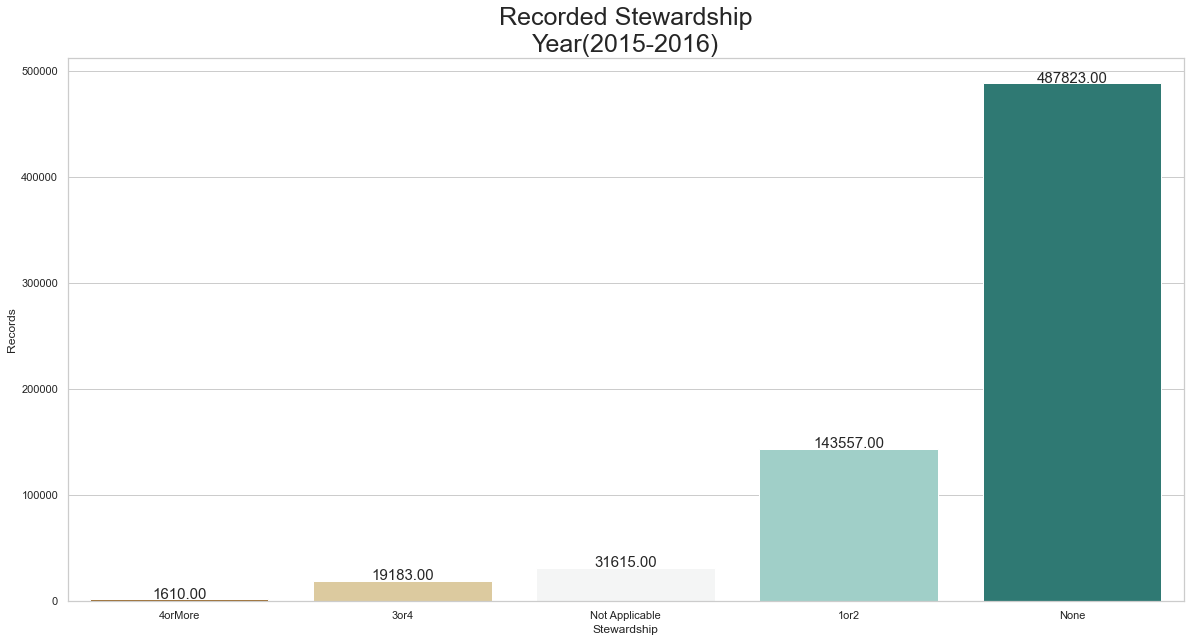

In [129]:
# Visualise scientific names recorded

# Set figsize
fig, ax = plt.subplots(1, 1, figsize=(20, 10))


# Plot
stwdPlot = sns.barplot(data = stewardship.sort_values('Count', ascending = False),
                       x = 'Steward',
                       y = 'Count',
                       palette = 'BrBG',
                       order = ['4orMore','3or4','Not Applicable','1or2','None'])

# Annotate
for bar in stwdPlot.patches:
    stwdPlot.annotate(format(bar.get_height(), '.2f'),
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                             ha = 'center',
                             va = 'center',
                             size = 15,
                             xytext = (0, 5),
                             textcoords = 'offset points')
             

# Customize fig
ax.set_xlabel('Stewardship')
ax.set_ylabel('Records')
plt.title('Recorded Stewardship\nYear(2015-2016)',
           size = 25)


# Save fig     
plt.savefig(r'D:\repos\github\ny_street-trees_2015\src\img\Recorded_Stewardship.png',
            facecolor="white")

# Plot fig
plt.show()

**figure-15:** The plot above shows the distribution of `tree stewardship` across different domain values. The "None" category has by far the largest count of trees, which can suggest that these trees had no unique signs of stewardship observed during the survey. However, the "4orMore" category has the smallest count of trees, with only 1,610 trees under stewardship. This suggests that relatively few trees have more than four signs of stewardship activity that was observed.